In [2031]:
# Loading of python packages which is required to build the Model

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

#  Data Engineering of Housing Dataset

## Loading Dataset

In [2032]:
# Loading the data and checking the initial 5 rows 

house_df = pd.read_csv("train.csv")
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2033]:
# Checking the size of the dataset

house_df.shape

(1460, 81)

In [2034]:
# Checking the datatype and missing values available in the dataset

house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [2035]:
# Checking for Duplicate Features in the dataset

house_df[house_df.duplicated()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


### Observation

#### No duplicate column(feature) is available in the dataset

## NaN value treatement in the dataset

In [2036]:
# Listing all columns names with NA/NaN values in it 
 
house_df.loc[:,house_df.isna().any(axis=0)].columns

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [2037]:
# Visualtion of all the columns with Na/NaN 

house_df.loc[:,house_df.isna().any(axis=0)]

,LotFrontage,Alley,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,65.0,NaN,BrkFace,196.0,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,2003.0,RFn,TA,TA,NaN,NaN,NaN
1,80.0,NaN,None,0.0,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Attchd,1976.0,RFn,TA,TA,NaN,NaN,NaN
2,68.0,NaN,BrkFace,162.0,Gd,TA,Mn,GLQ,Unf,SBrkr,TA,Attchd,2001.0,RFn,TA,TA,NaN,NaN,NaN
3,60.0,NaN,None,0.0,TA,Gd,No,ALQ,Unf,SBrkr,Gd,Detchd,1998.0,Unf,TA,TA,NaN,NaN,NaN
4,84.0,NaN,BrkFace,350.0,Gd,TA,Av,GLQ,Unf,SBrkr,TA,Attchd,2000.0,RFn,TA,TA,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,NaN,None,0.0,Gd,TA,No,Unf,Unf,SBrkr,TA,Attchd,1999.0,RFn,TA,TA,NaN,NaN,NaN
1456,85.0,NaN,Stone,119.0,Gd,TA,No,ALQ,Rec,SBrkr,TA,Attchd,1978.0,Unf,TA,TA,NaN,MnPrv,NaN
1457,66.0,NaN,None,0.0,TA,Gd,No,GLQ,Unf,SBrkr,Gd,Attchd,1941.0,RFn,TA,TA,NaN,GdPrv,Shed
1458,68.0,NaN,None,0.0,TA,TA,Mn,GLQ,Rec,FuseA,NaN,Attchd,1950.0,Unf,TA,TA,NaN,NaN,NaN


In [2038]:
# Calculating the percentage of NA/NaN present in each columns

house_df[house_df.columns[house_df.isnull().any()]].isnull().sum() * 100 / df.shape[0]

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

In [2039]:
# Dropping of Feature which has more than 15% value as NaN value present in it.
# As dataset is small hence cutoff value of 15% is taken so that datset should get biased due to imputing.

# Alley has 93.76% of data as NaN
# PoolQC has 99.52% of data as NaN
# MiscFeature has 96.30% of data as NaN
# LotFrontage has 17.73% of data as NaN
# Fence has 80.75% of data as NaN
# FireplaceQu has 47.26% of data as NaN
# Id is just a serial number doesn't make any sence in the dataset

drop_NaN_col = ['Alley','PoolQC','MiscFeature','LotFrontage','Fence','FireplaceQu','Id']
house_df.drop(drop_NaN_col, axis=1, inplace=True)

In [2040]:
# Checking the shape of dataset after dropping feature with high NaN value

house_df.shape


(1460, 74)

##  Checking Skewed feature in the Dataset


In [2041]:
# Listing all the numeric type feature

num_col = house_df.iloc[:, (np.where((house_df.dtypes == np.int64) | (house_df.dtypes == np.float64)))[0]].columns
num_col

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

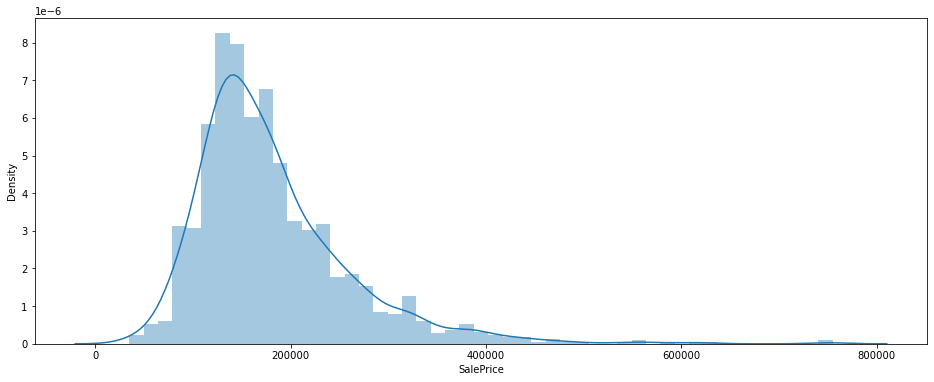

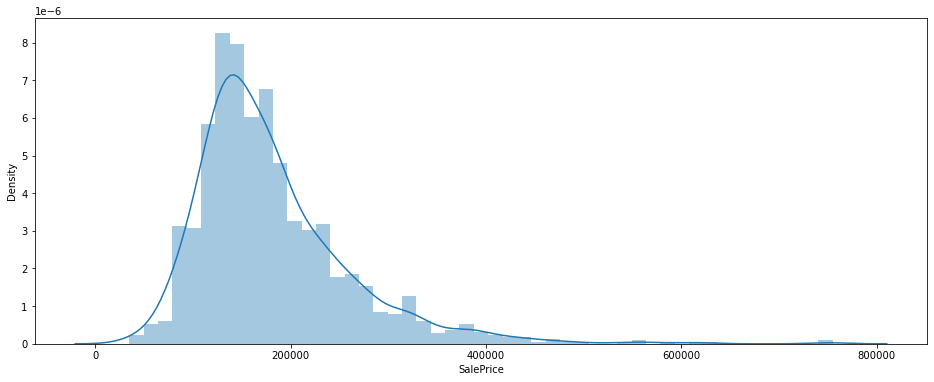

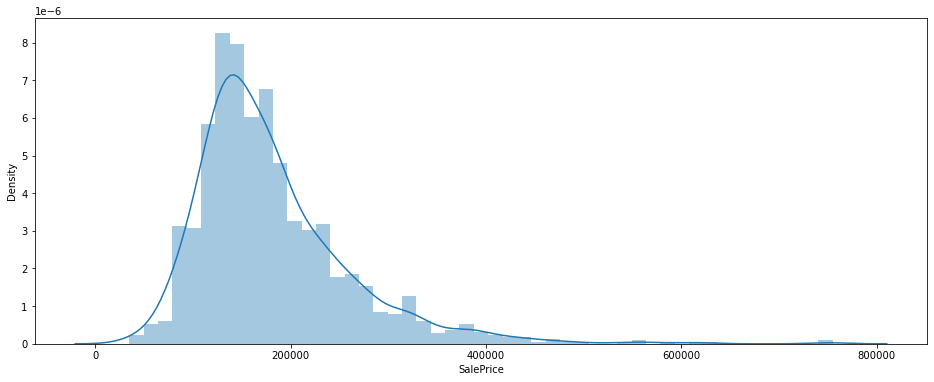

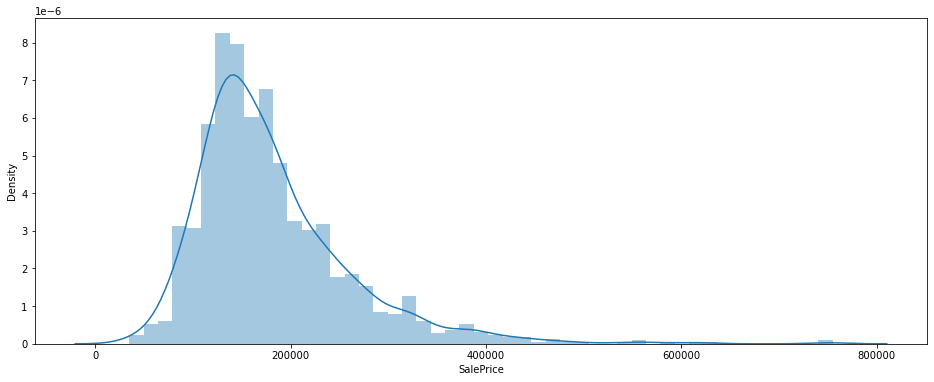

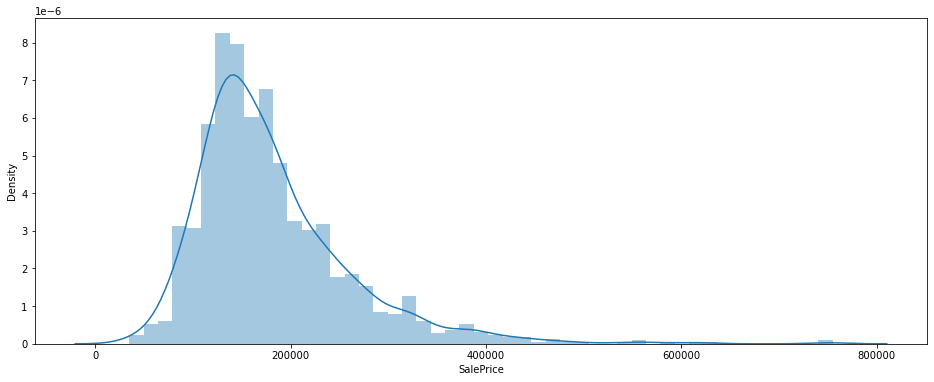

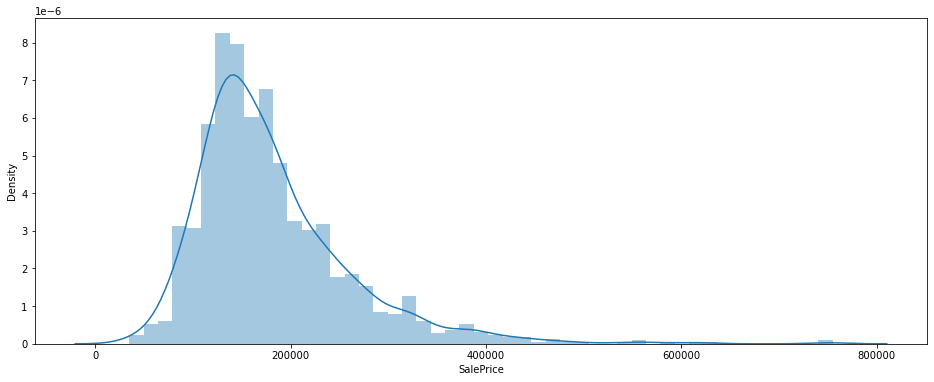

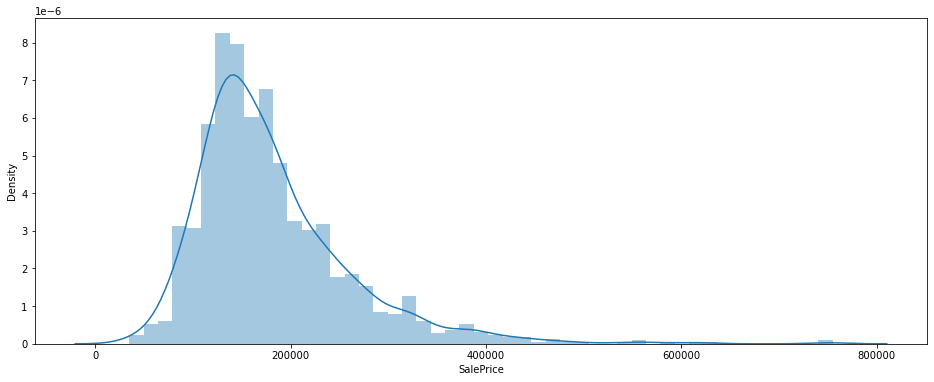

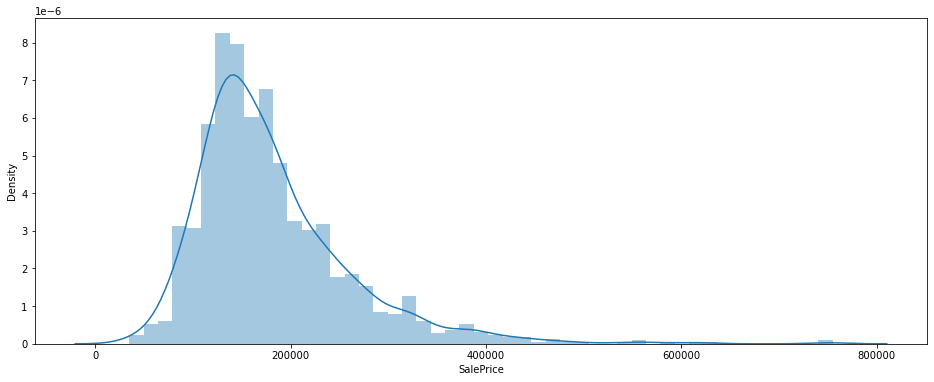

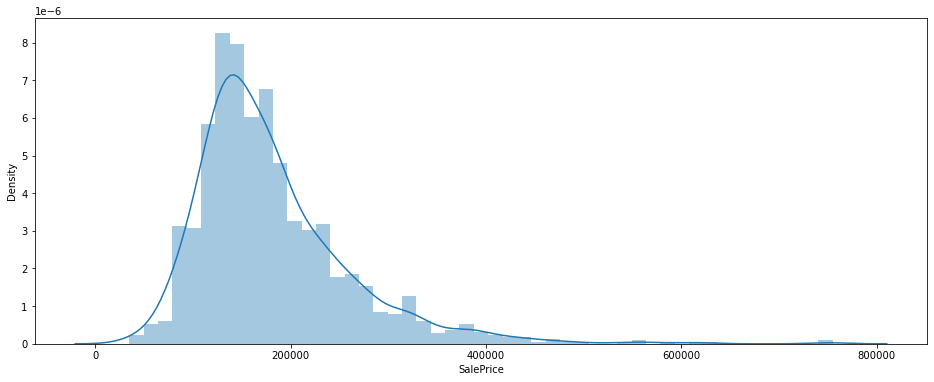

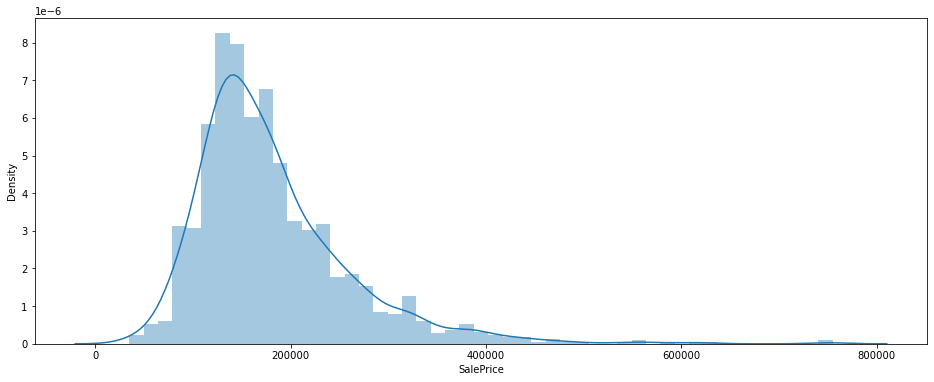

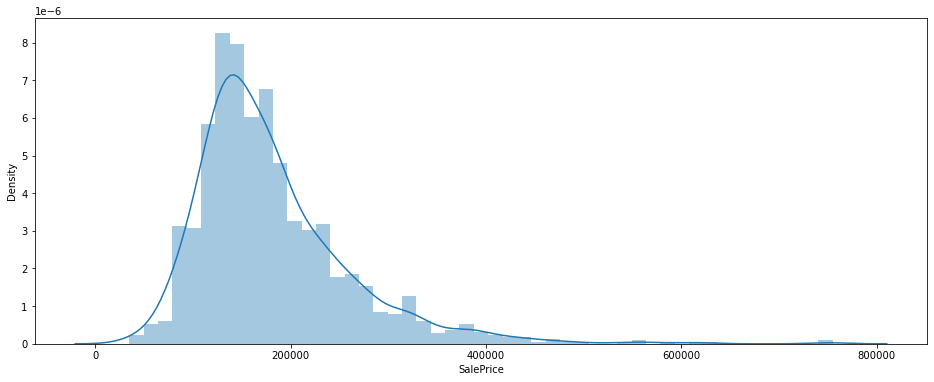

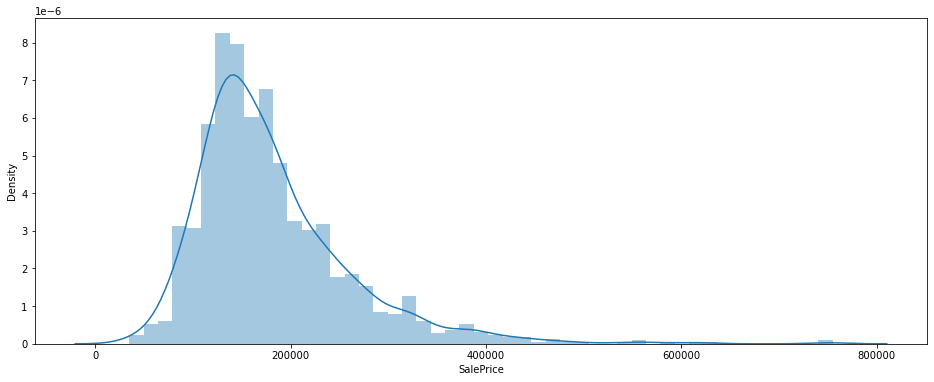

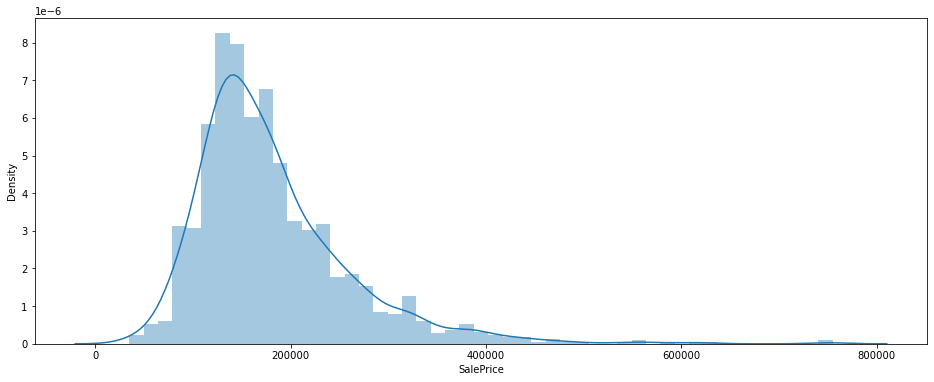

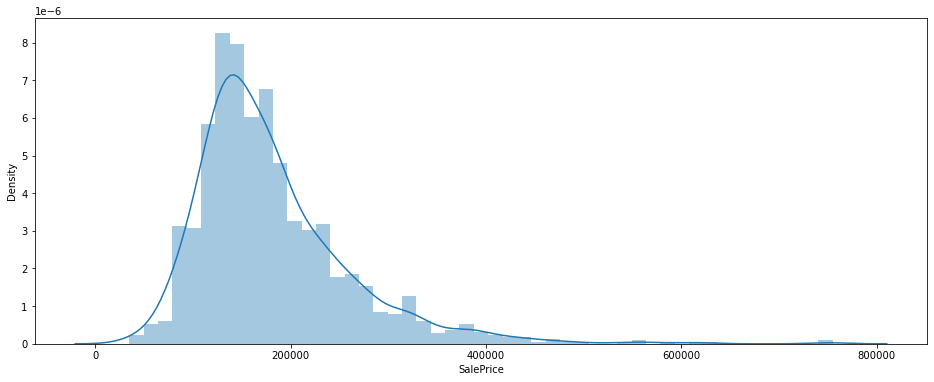

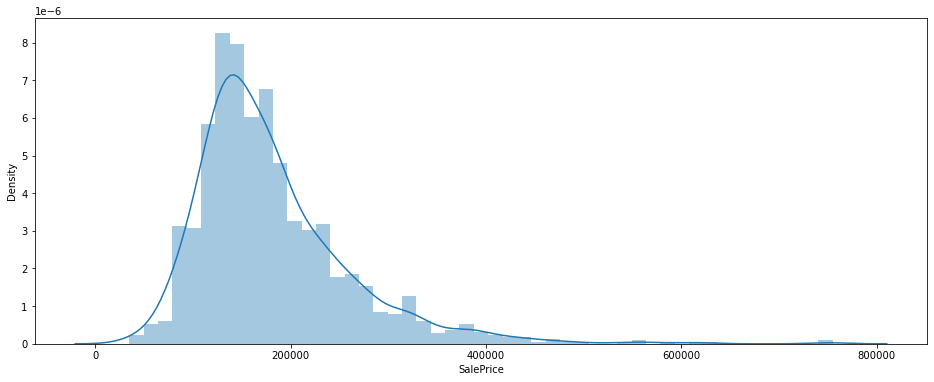

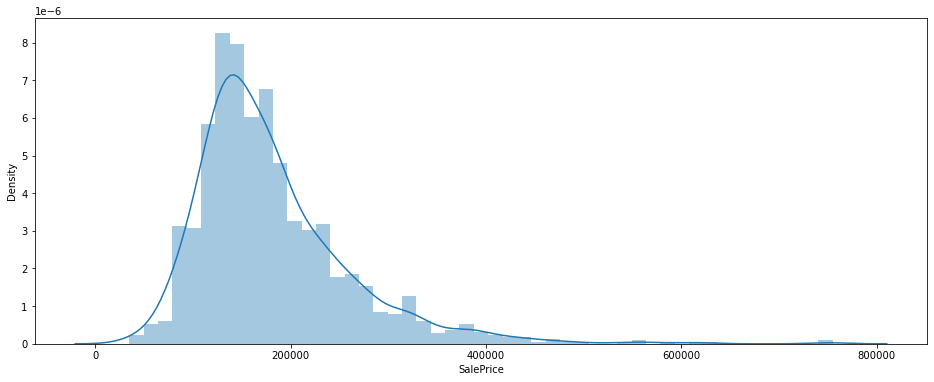

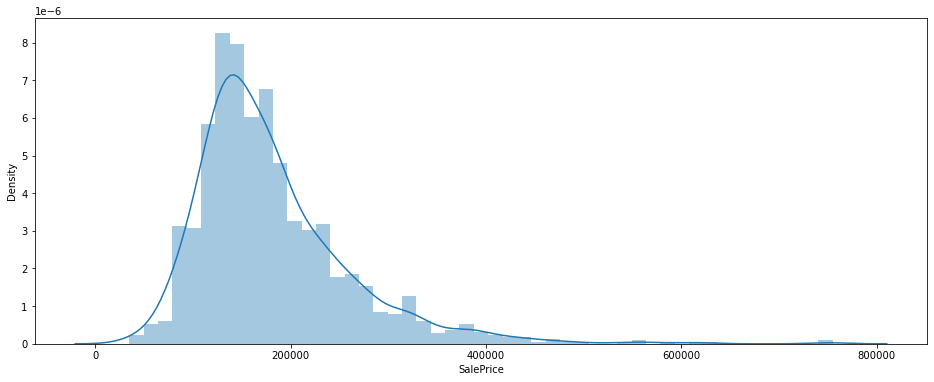

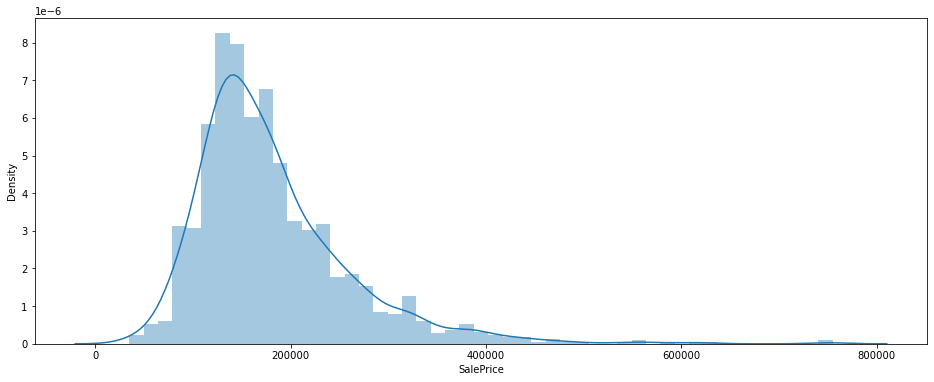

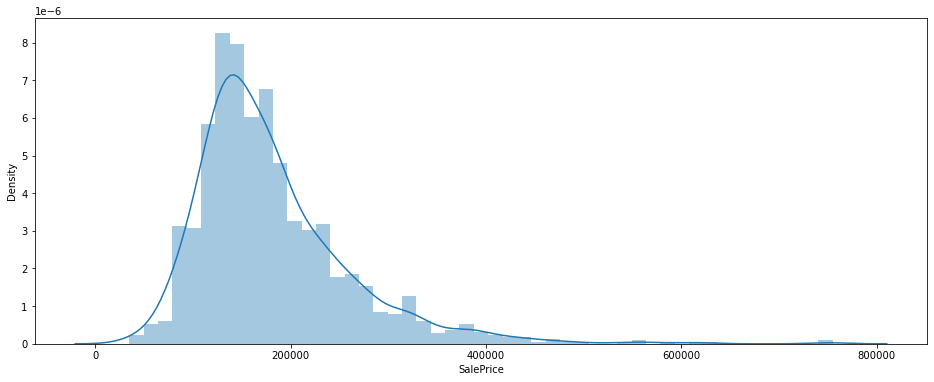

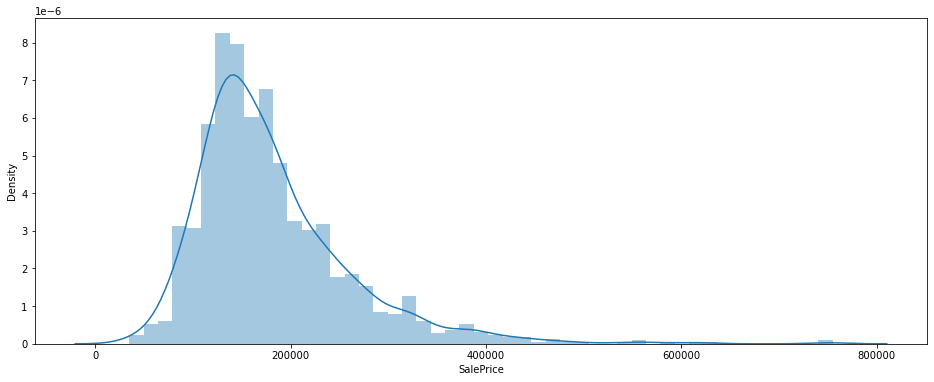

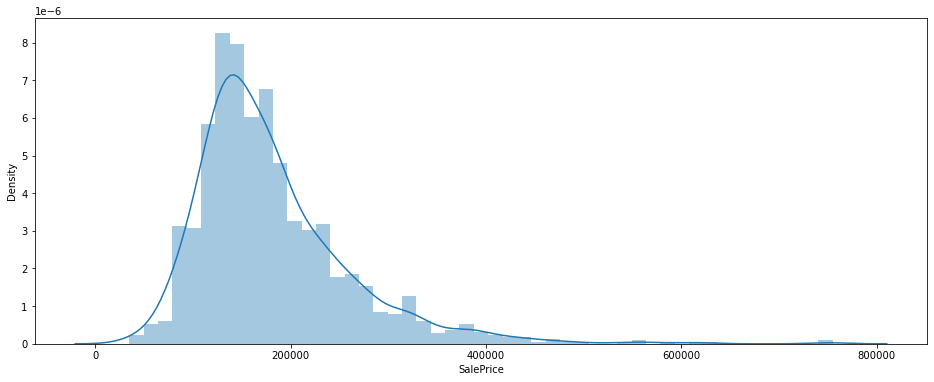

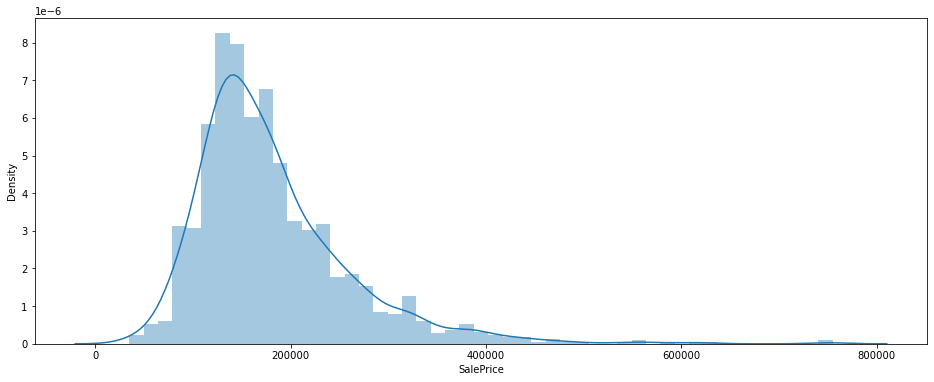

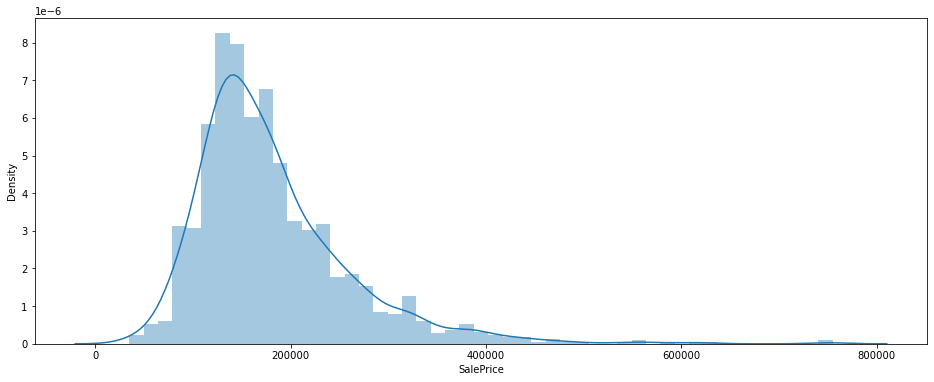

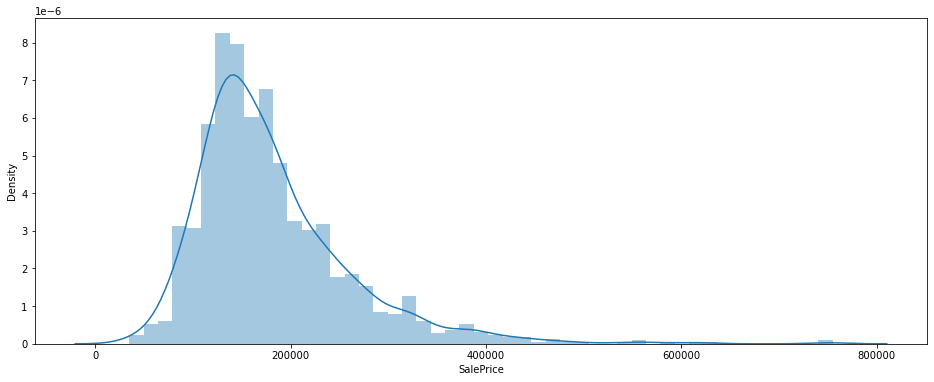

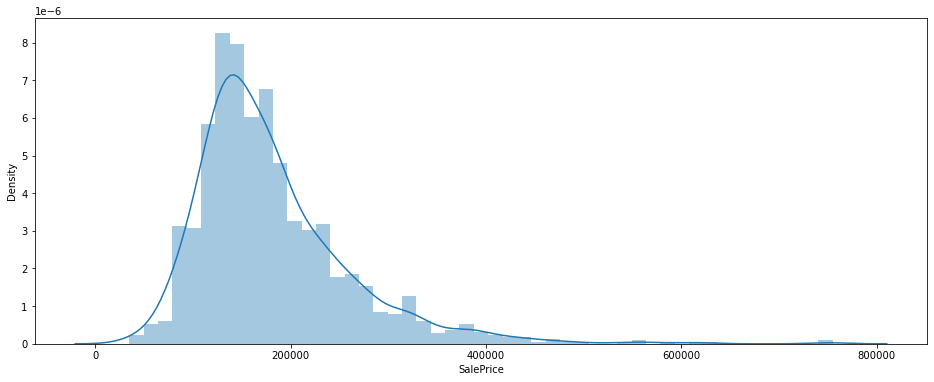

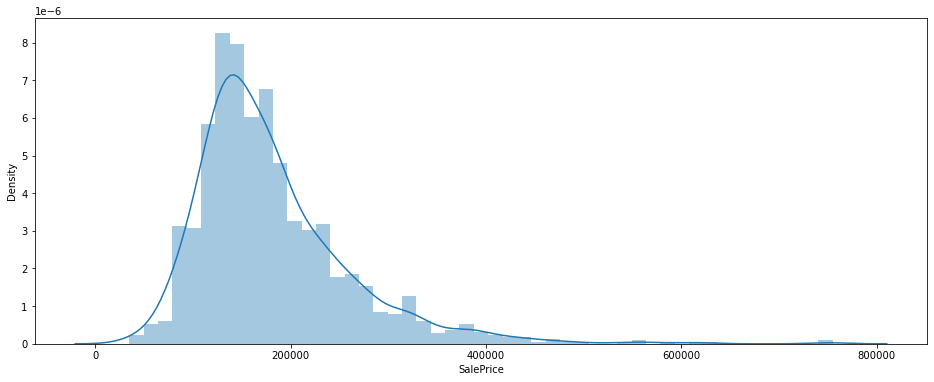

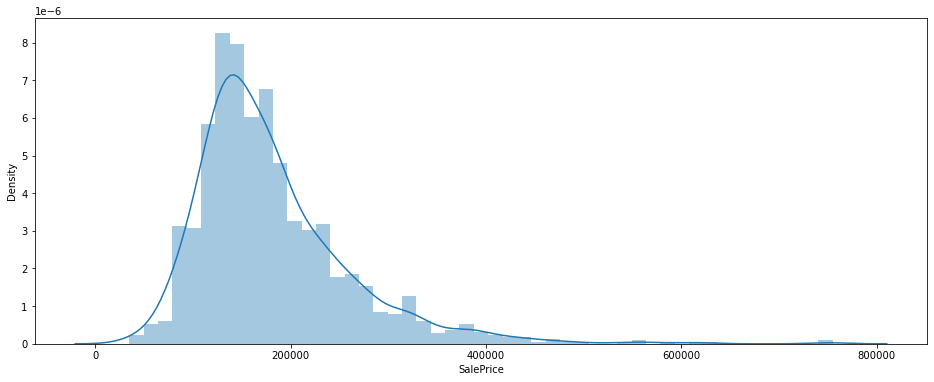

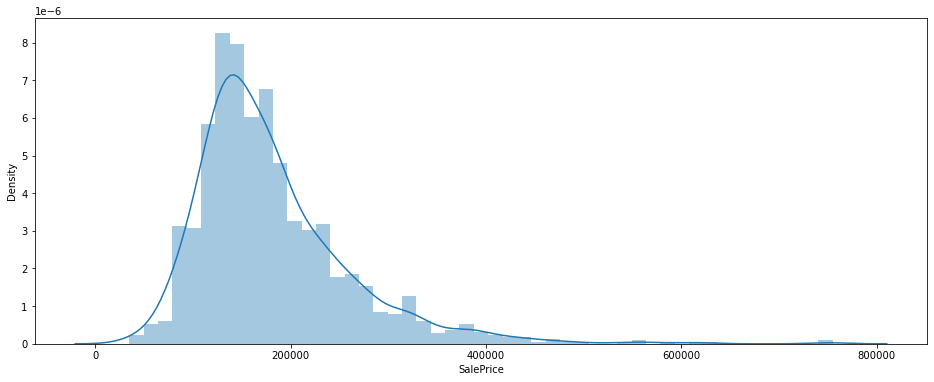

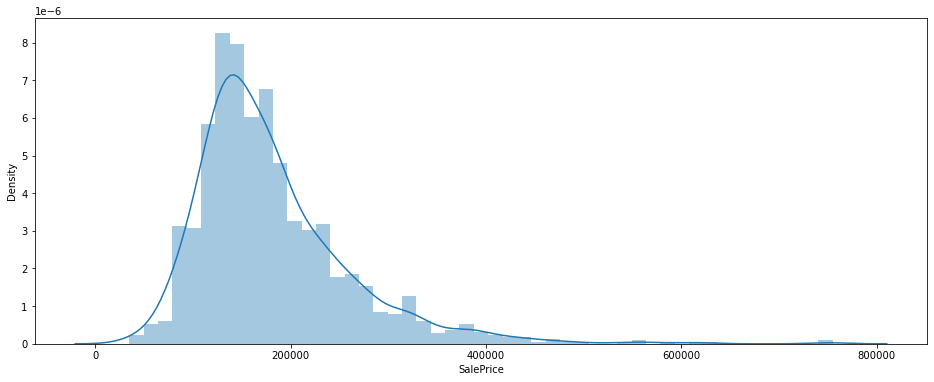

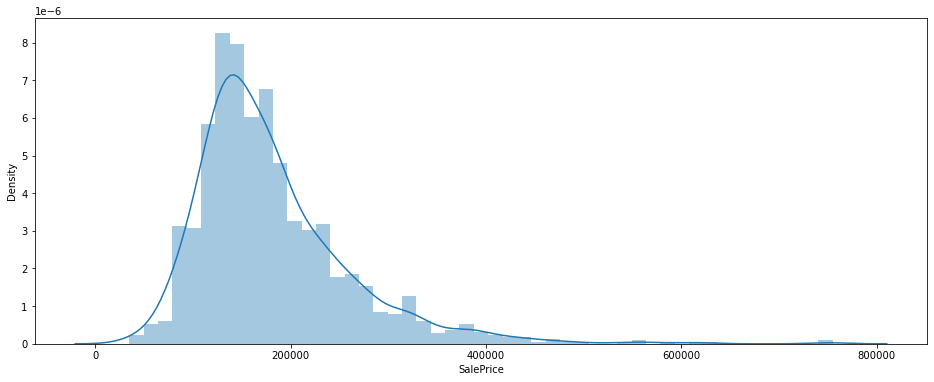

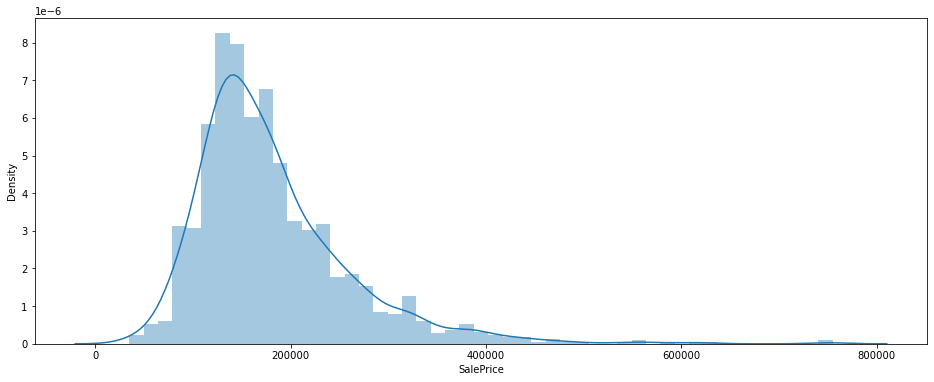

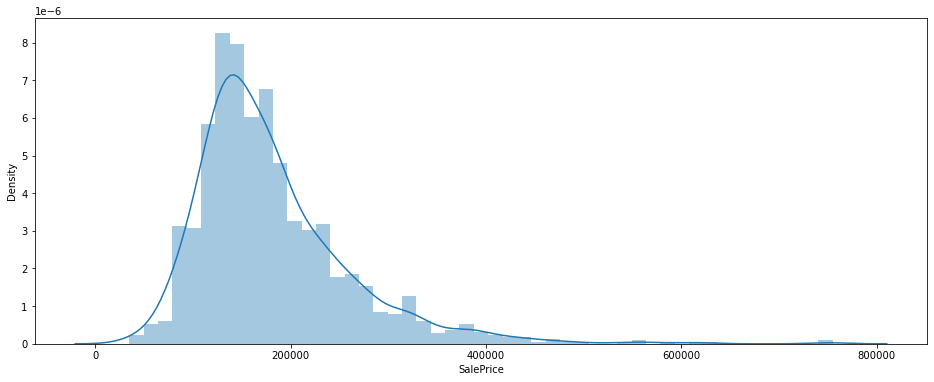

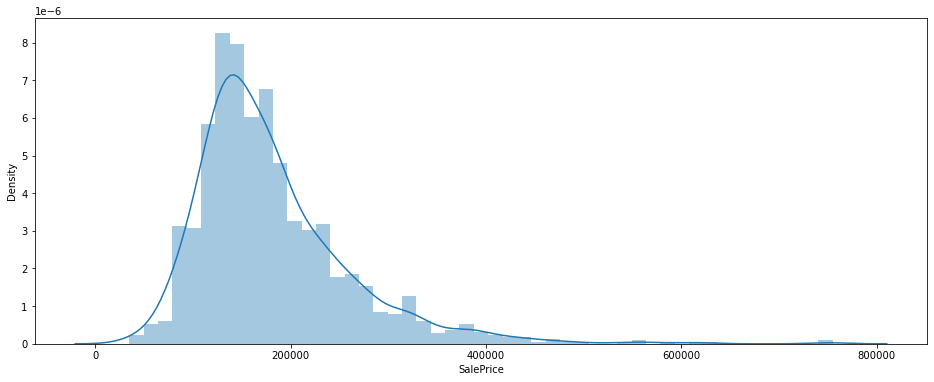

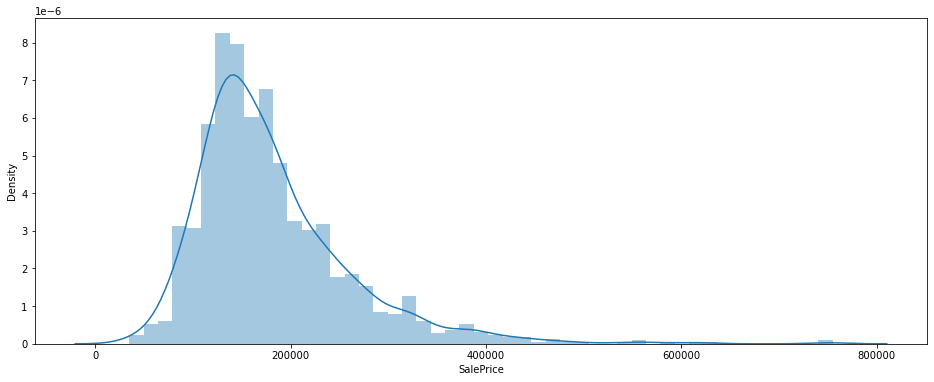

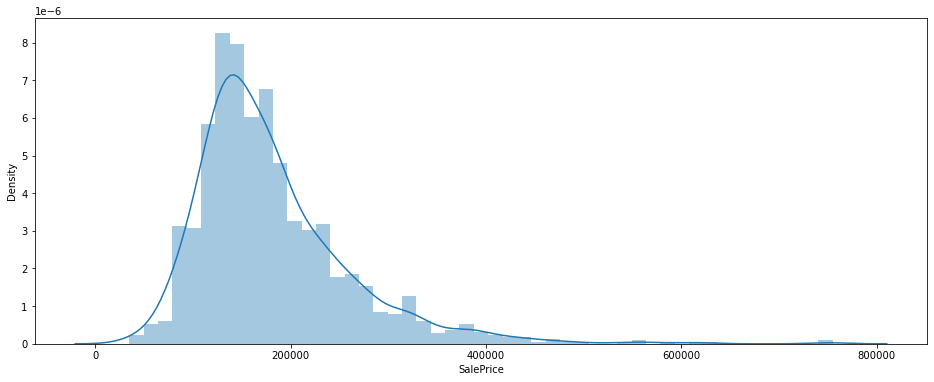

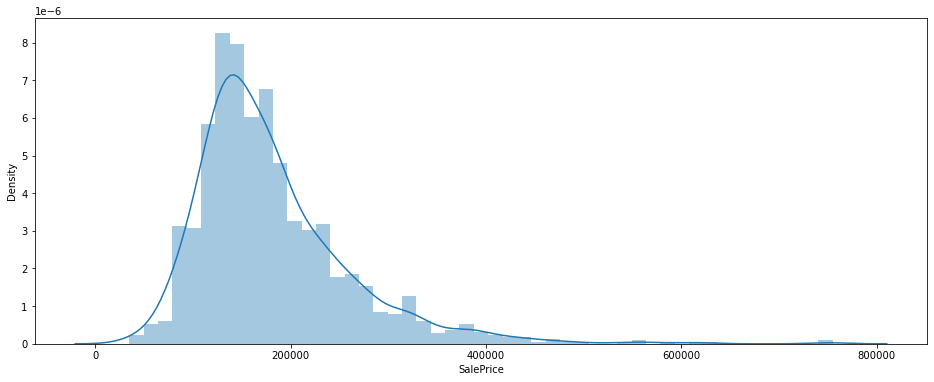

In [2042]:
for col in num_col:
    plt.figure(figsize=(16,6))
    sns.distplot(house_df.SalePrice)
    plt.show()

### Obervation

#### From the above distribution plot we can see many features are right side-skewed

In [2043]:
# If the data has more than 90% same value in it then it is skewed.
# It will lead to violation of normal distribution assumption for linear regression

# Finding 90% thresold value

thresold_value = 1460*90/100
thresold_value

1314.0

In [2044]:
#Listing all the skewed feature

list_col_skrew = []
for col in house_df:
    if house_df[col].value_counts().max() >= thresold_value:
        list_col_skrew.append(col)
list_col_skrew

['Street',
 'Utilities',
 'LandSlope',
 'Condition2',
 'RoofMatl',
 'Heating',
 'CentralAir',
 'Electrical',
 'LowQualFinSF',
 'BsmtHalfBath',
 'KitchenAbvGr',
 'Functional',
 'GarageCond',
 'PavedDrive',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal']

In [2045]:
# Dropping all the feature which is skewed

house_df.drop(list_col_skrew, axis=1, inplace=True)

#Checking shape of dataset after dropping features

house_df.shape

(1460, 56)

## Derived Feature

In [2046]:
# Deriving new column with how much year old Building,Remodelling, Garage build and last sold year

house_df['YrSold_Old'] = house_df.YrSold.max() - house_df.YrSold
house_df['YearRemodAdd_Old'] = house_df.YearRemodAdd.max() - house_df.YearRemodAdd
house_df['YearBuilt_Old'] = house_df.YearBuilt.max() - house_df.YearBuilt
house_df['GarageYrBlt_Old'] = house_df.GarageYrBlt.max() - house_df.GarageYrBlt

In [2047]:
# Dropping the feature as new feature is derived 
house_df.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],axis=1,inplace=True)

In [2048]:
house_df[['GarageYrBlt_Old','YrSold_Old','YearBuilt_Old','YearRemodAdd_Old']].head()

,GarageYrBlt_Old,YrSold_Old,YearBuilt_Old,YearRemodAdd_Old
0,7.0,2,7,7
1,34.0,3,34,34
2,9.0,2,9,8
3,12.0,4,95,40
4,10.0,2,10,10


In [2049]:
# GarageYrBl_Old has NaN value for those houses which has no garage.
# House with no garage should put negative impact on selling price of the Price.
# Repacing GarageYrBl_Old with -1 value.

house_df.GarageYrBlt_Old.fillna(-1,inplace=True)

## Data Imputation

In [2050]:
#checking the remaining feature with NaN value for which data imputation need to be done.

house_df[house_df.columns[house_df.isnull().any()]].isnull().sum() * 100 / df.shape[0]

MasVnrType      0.547945
MasVnrArea      0.547945
BsmtQual        2.534247
BsmtCond        2.534247
BsmtExposure    2.602740
BsmtFinType1    2.534247
BsmtFinType2    2.602740
GarageType      5.547945
GarageFinish    5.547945
GarageQual      5.547945
dtype: float64

In [2051]:
# Listing feature name with NaN in it

NaN_cols = house_df.loc[:,house_df.isna().any(axis=0)].columns
NaN_cols

Index(['MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'GarageType', 'GarageFinish',
       'GarageQual'],
      dtype='object')

In [2052]:
# Finding the count of each information given NaN_cols list of feature

for col in NaN_cols:
    print(col + " value count")
    print(house_df[col].value_counts())

MasVnrType value count
None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64
MasVnrArea value count
0.0      861
108.0      8
72.0       8
180.0      8
16.0       7
        ... 
31.0       1
366.0      1
528.0      1
894.0      1
415.0      1
Name: MasVnrArea, Length: 327, dtype: int64
BsmtQual value count
TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64
BsmtCond value count
TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64
BsmtExposure value count
No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64
BsmtFinType1 value count
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64
BsmtFinType2 value count
Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64
GarageType value count
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: in

In [2053]:
# MasVnrArea is only is a numeric type feature and rest are categorical feature

In [2054]:
# Imputing categorical feature with MODE value

cat_var_list = ['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'GarageType', 'GarageFinish', 'GarageQual']
for col in cat_var_list:
    house_df[col].fillna(house_df[col].mode()[0], inplace=True)

In [2055]:
# Imputing numeric feature with with mean value

house_df.MasVnrArea.fillna(house_df.MasVnrArea.mean(),inplace=True)

In [2056]:
# Checking the % of feature with NaN in it

house_df[house_df.columns[house_df.isnull().any()]].isnull().sum() * 100 / df.shape[0]

Series([], dtype: float64)

### Observation
#### All the feature with NaN values is imputed with required data.
#### Dataset is free from NaN in it

In [2057]:
# Checking clear dataset and missing value

house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 56 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MSSubClass        1460 non-null   int64  
 1   MSZoning          1460 non-null   object 
 2   LotArea           1460 non-null   int64  
 3   LotShape          1460 non-null   object 
 4   LandContour       1460 non-null   object 
 5   LotConfig         1460 non-null   object 
 6   Neighborhood      1460 non-null   object 
 7   Condition1        1460 non-null   object 
 8   BldgType          1460 non-null   object 
 9   HouseStyle        1460 non-null   object 
 10  OverallQual       1460 non-null   int64  
 11  OverallCond       1460 non-null   int64  
 12  RoofStyle         1460 non-null   object 
 13  Exterior1st       1460 non-null   object 
 14  Exterior2nd       1460 non-null   object 
 15  MasVnrType        1460 non-null   object 
 16  MasVnrArea        1460 non-null   float64


##  EDA

In [2058]:
# Filtering list of numeric and categorial features

# continuous feature listing
num_cols = house_df.iloc[:, (np.where((house_df.dtypes == np.int64) | (house_df.dtypes == np.float64)))[0]].columns
num_cols

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'MoSold',
       'SalePrice', 'YrSold_Old', 'YearRemodAdd_Old', 'YearBuilt_Old',
       'GarageYrBlt_Old'],
      dtype='object')

In [2059]:
# Categorical feature listing

cat_cols = [col for col in house_df if col not in num_cols]
cat_cols

['MSZoning',
 'LotShape',
 'LandContour',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'HeatingQC',
 'KitchenQual',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'SaleType',
 'SaleCondition']

Visualisation of numeric feature with Target feature "SalePrice"

<Figure size 1440x864 with 0 Axes>

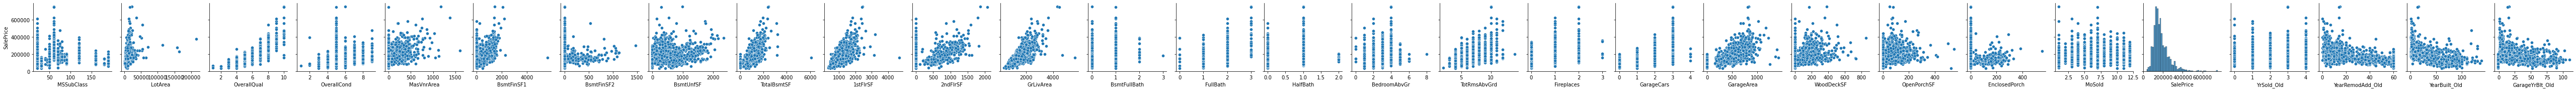

In [2060]:
plt.figure(figsize=(20,12))
sns.pairplot(data=house_df, y_vars="SalePrice", x_vars=num_cols)
plt.show()

### Observation

#### Feature like OverallQual, OverallCond, 1stFlrSF, GrLiveArea shows positive correlation with SalePrice.
#### Feature likeYearRemodAdd_Old , YearBuild_Old and GarageYrBlt_Old has negative correlation.

In [2061]:
# Checking numeric feature differnt percentile and min,max value

house_df.describe()

,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,SalePrice,YrSold_Old,YearRemodAdd_Old,YearBuilt_Old,GarageYrBlt_Old
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,10516.828082,6.099315,5.575342,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,...,472.980137,94.244521,46.660274,21.954110,6.321918,180921.195890,2.184247,25.134247,38.732192,29.691096
std,42.300571,9981.264932,1.382997,1.112799,180.569112,456.098091,161.319273,441.866955,438.705324,386.587738,...,213.804841,125.338794,66.256028,61.119149,2.703626,79442.502883,1.328095,20.645407,30.202904,25.121824
min,20.000000,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,34900.000000,0.000000,0.000000,0.000000,-1.000000
25%,20.000000,7553.500000,5.000000,5.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,...,334.500000,0.000000,0.000000,0.000000,5.000000,129975.000000,1.000000,6.000000,10.000000,7.000000
50%,50.000000,9478.500000,6.000000,5.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,...,480.000000,0.000000,25.000000,0.000000,6.000000,163000.000000,2.000000,16.000000,37.000000,25.500000
75%,70.000000,11601.500000,7.000000,6.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,...,576.000000,168.000000,68.000000,0.000000,8.000000,214000.000000,3.000000,43.000000,56.000000,48.000000
max,190.000000,215245.000000,10.000000,9.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,...,1418.000000,857.000000,547.000000,552.000000,12.000000,755000.000000,4.000000,60.000000,138.000000,110.000000


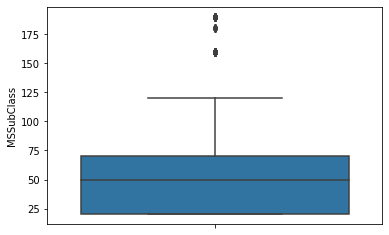

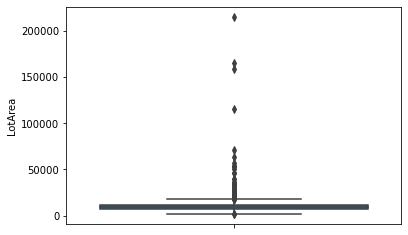

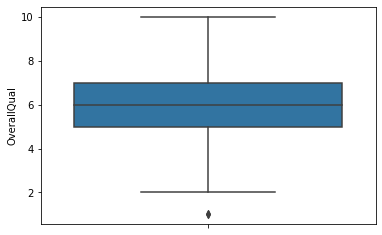

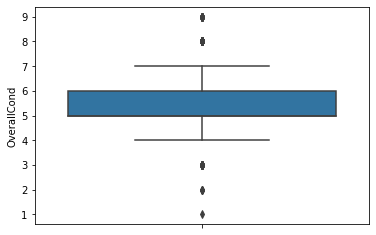

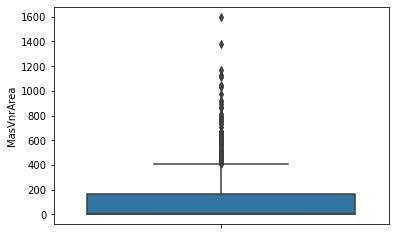

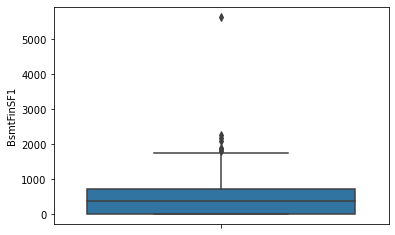

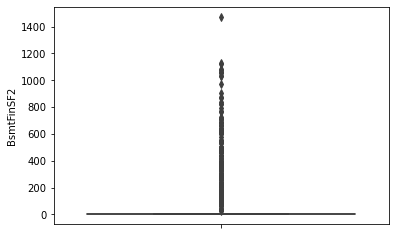

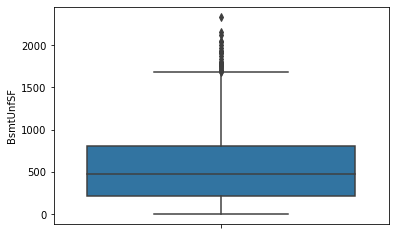

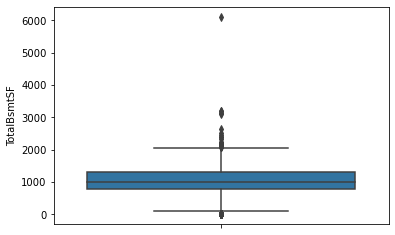

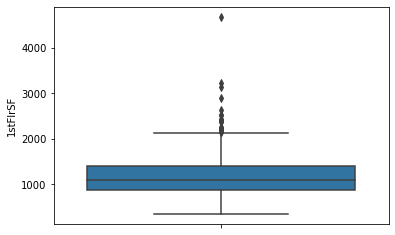

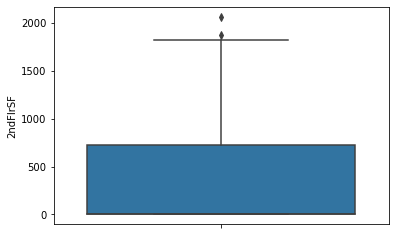

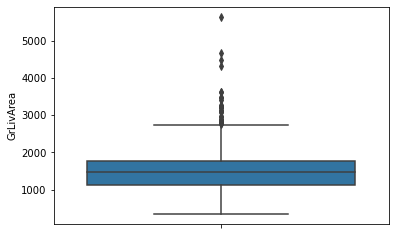

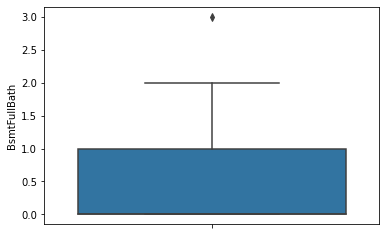

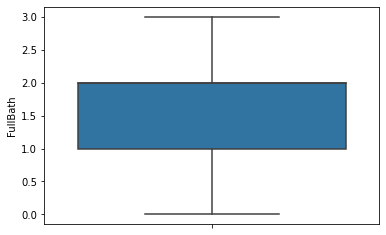

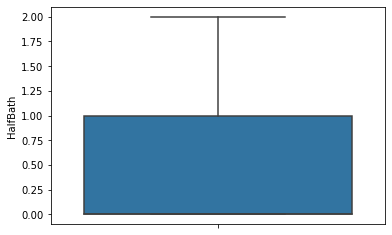

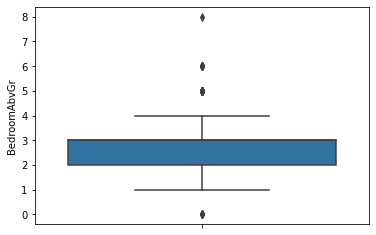

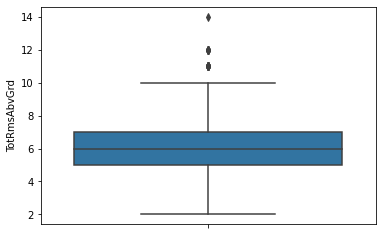

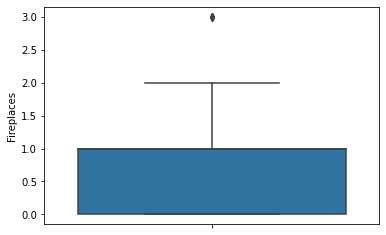

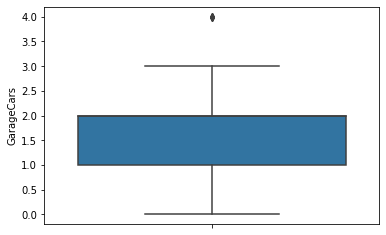

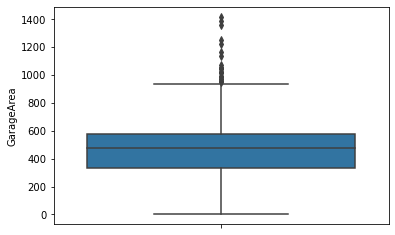

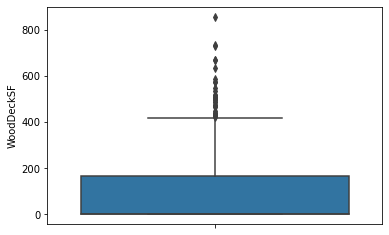

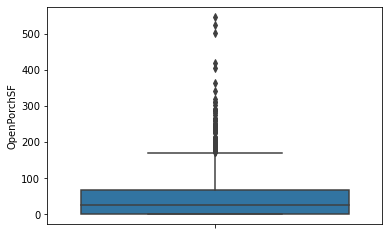

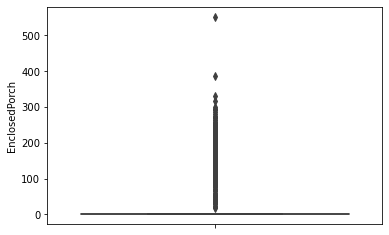

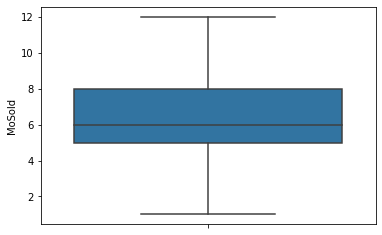

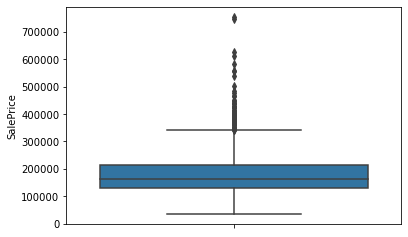

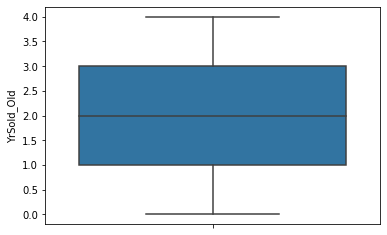

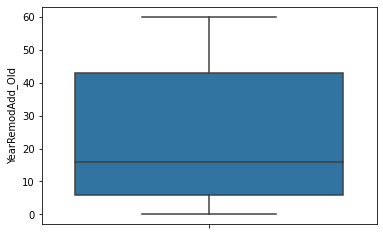

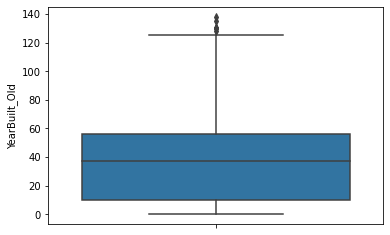

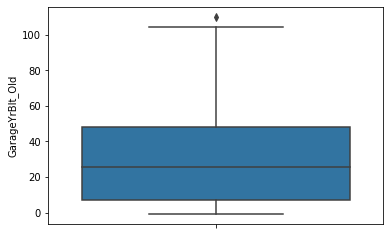

In [2062]:
for col in num_cols:
    plt.figure()
    sns.boxplot(y=house_df[col])
    plt.show()

### Observation

#### We can clearly see many features has outliers which need to be removed.

In [2063]:
# Checking shape before outlier removal

house_df.shape

(1460, 56)

In [2064]:
# Dropping outlier 
# Lower thresold is 25 percentile and upper thresold is 95 percentile

def drop_outliers(x):
    lists = []
    for col in num_cols:
        Q1 = x[col].quantile(.25) 
        Q3 = x[col].quantile(.95)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x   

house_df = drop_outliers(house_df)

In [2065]:
# Checking shape after outlier removal

house_df.shape

(1417, 56)

<Figure size 1440x864 with 0 Axes>

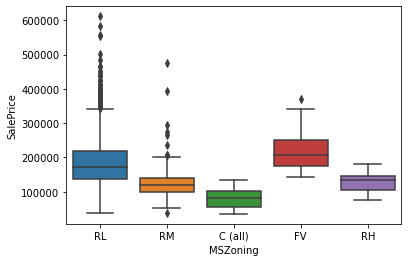

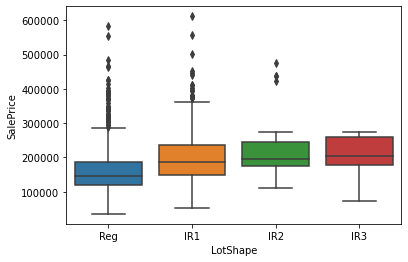

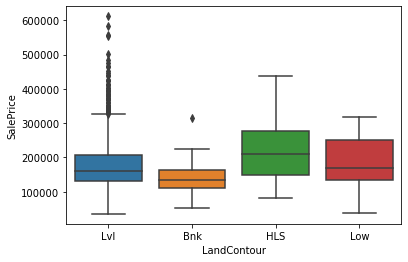

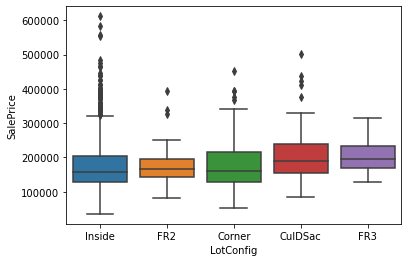

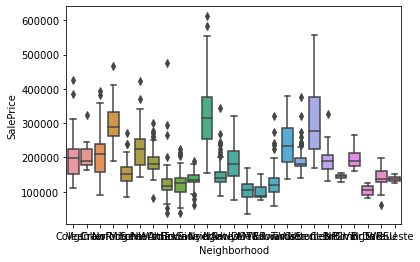

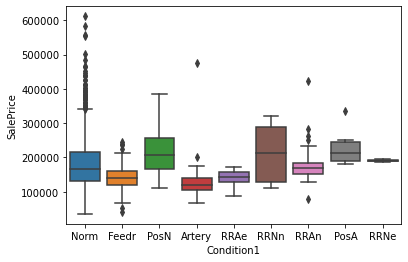

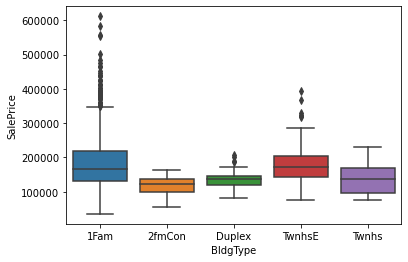

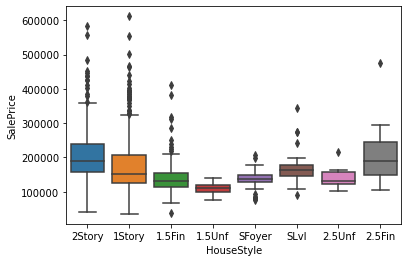

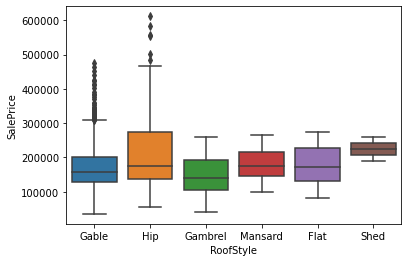

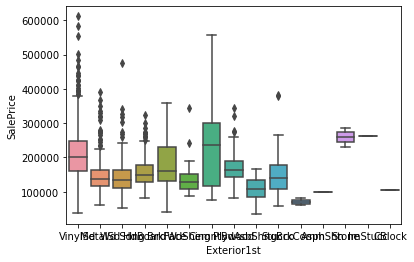

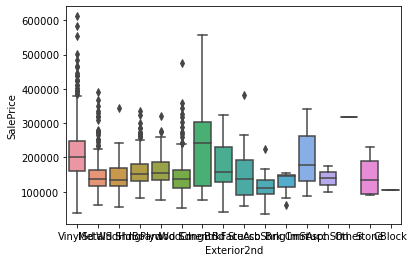

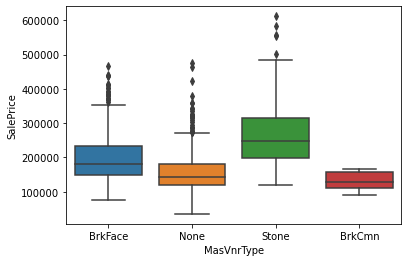

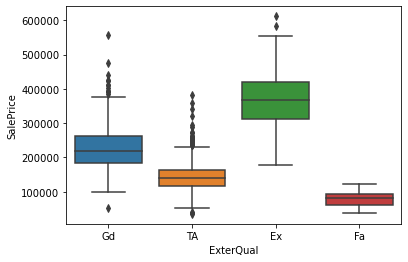

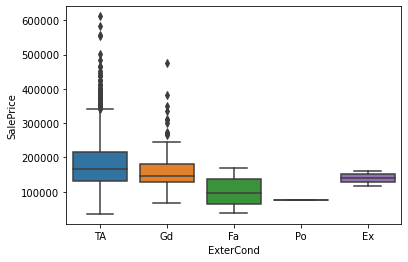

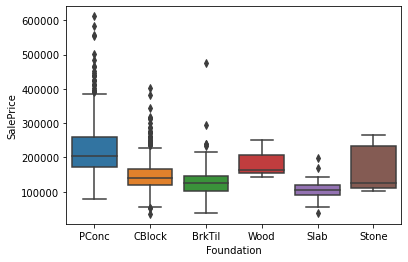

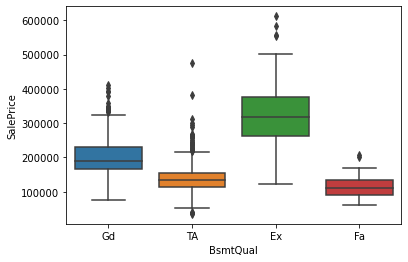

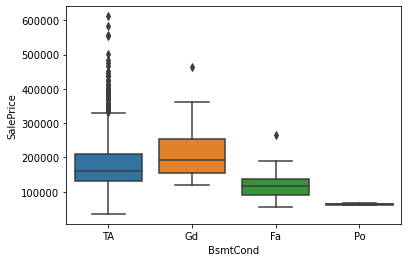

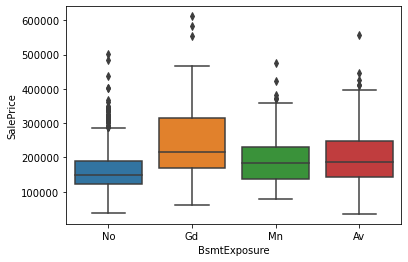

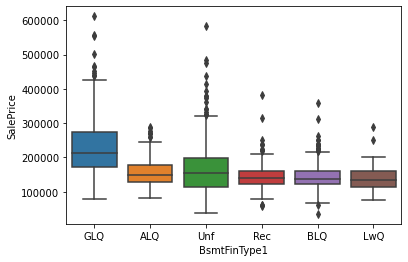

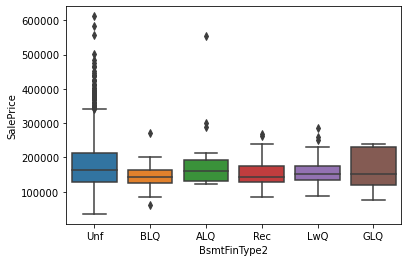

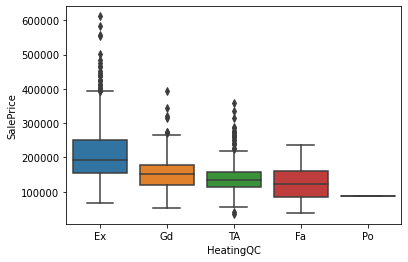

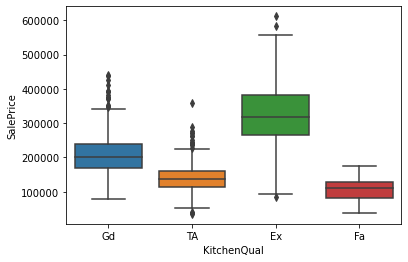

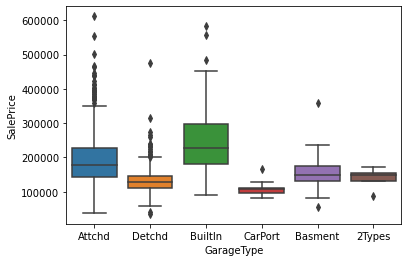

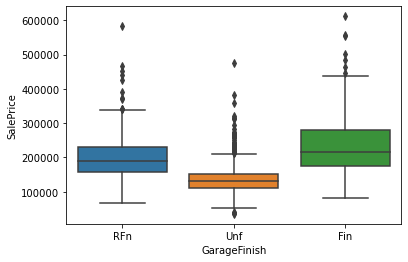

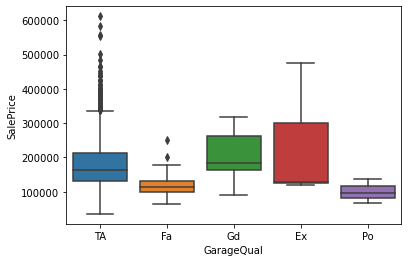

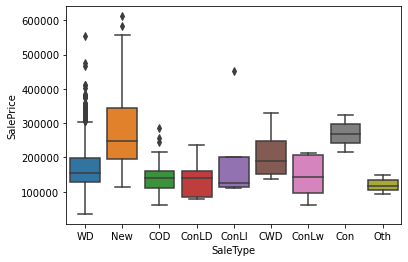

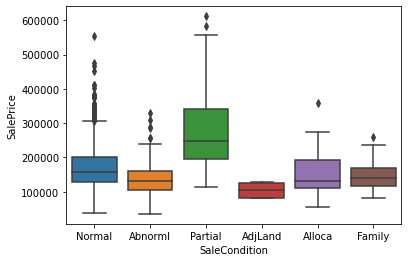

In [2066]:
# Analysing categorical variables with target variables

plt.figure(figsize=(20,12))

for col in cat_cols:
    plt.figure()
    sns.boxplot(x=col, y='SalePrice', data=house_df)
    plt.show()

## Data Transformation

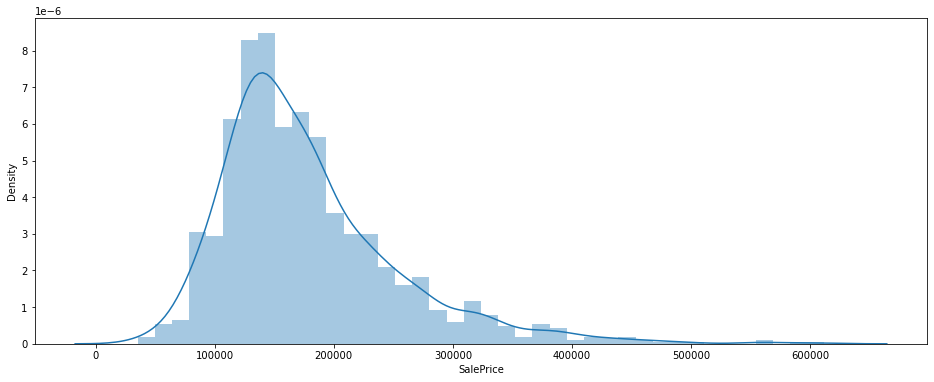

In [2067]:
# checking distribution of target variables

plt.figure(figsize=(16,6))
sns.distplot(house_df.SalePrice)
plt.show()

### Obervation
#### SalePrice target vatiable is right-skewed


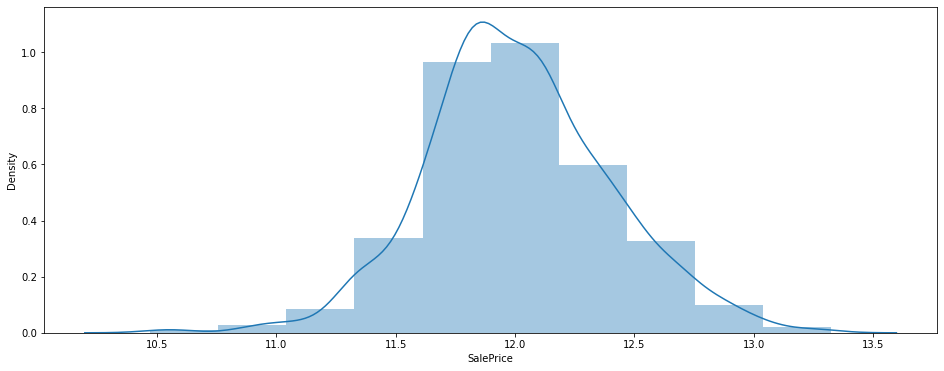

In [2068]:
house_df['SalePrice'] = np.log(house_df.SalePrice)
plt.figure(figsize=(16,6))
sns.distplot(house_df.SalePrice, bins=10)
plt.show()

In [2069]:
house_df.SalePrice.describe()

count    1417.000000
mean       12.012220
std         0.389898
min        10.471950
25%        11.767568
50%        11.982929
75%        12.254863
max        13.323927
Name: SalePrice, dtype: float64

In [2070]:
# Description of continuous variables 
house_df.corr()

,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,MoSold,SalePrice,YrSold_Old,YearRemodAdd_Old,YearBuilt_Old,GarageYrBlt_Old
MSSubClass,1.000000,-0.384350,0.038059,-0.062449,0.022649,-0.079589,-0.065131,-0.139901,-0.260019,-0.269992,...,-0.106212,-0.019701,0.004972,-0.007025,-0.004653,-0.076210,0.017706,-0.042366,-0.031162,-0.100381
LotArea,-0.384350,1.000000,0.188026,-0.004660,0.126322,0.157460,0.070378,0.094670,0.294459,0.399435,...,0.307633,0.155250,0.134642,-0.013366,0.010823,0.392342,0.013500,-0.043922,-0.060560,0.022421
OverallQual,0.038059,0.188026,1.000000,-0.099208,0.416620,0.211424,-0.099227,0.316455,0.538943,0.466900,...,0.561119,0.235298,0.329384,-0.126189,0.073167,0.825449,0.020959,-0.553081,-0.583855,-0.423743
OverallCond,-0.062449,-0.004660,-0.099208,1.000000,-0.135168,-0.028771,0.049119,-0.147938,-0.176839,-0.144943,...,-0.148376,-0.011507,-0.046071,0.090609,-0.005545,-0.042996,-0.039127,-0.069596,0.374877,0.298440
MasVnrArea,0.022649,0.126322,0.416620,-0.135168,1.000000,0.220878,-0.066591,0.129612,0.354255,0.336401,...,0.381147,0.151230,0.134243,-0.107834,0.009393,0.441711,-0.010762,-0.180389,-0.323037,-0.206548
BsmtFinSF1,-0.079589,0.157460,0.211424,-0.028771,0.220878,1.000000,-0.047999,-0.542963,0.445362,0.369096,...,0.257960,0.174349,0.080515,-0.121174,0.005728,0.372172,-0.028764,-0.129117,-0.251368,-0.108476
BsmtFinSF2,-0.065131,0.070378,-0.099227,0.049119,-0.066591,-0.047999,1.000000,-0.196667,0.067208,0.069375,...,-0.035593,0.057903,-0.017153,0.052926,-0.005284,-0.046518,-0.034525,0.092673,0.066766,0.101597
BsmtUnfSF,-0.139901,0.094670,0.316455,-0.147938,0.129612,-0.542963,-0.196667,1.000000,0.459728,0.346136,...,0.196384,0.012349,0.131661,-0.008333,0.029145,0.234942,0.040636,-0.182264,-0.156407,-0.169312
TotalBsmtSF,-0.260019,0.294459,0.538943,-0.176839,0.354255,0.445362,0.067208,0.459728,1.000000,0.794960,...,0.477370,0.217579,0.224411,-0.119782,0.036371,0.637090,0.002712,-0.306305,-0.415970,-0.267210
1stFlrSF,-0.269992,0.399435,0.466900,-0.144943,0.336401,0.369096,0.069375,0.346136,0.794960,1.000000,...,0.478585,0.214912,0.183686,-0.088101,0.055988,0.607106,0.000662,-0.249848,-0.294668,-0.181127


In [2071]:
num_cols

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'MoSold',
       'SalePrice', 'YrSold_Old', 'YearRemodAdd_Old', 'YearBuilt_Old',
       'GarageYrBlt_Old'],
      dtype='object')

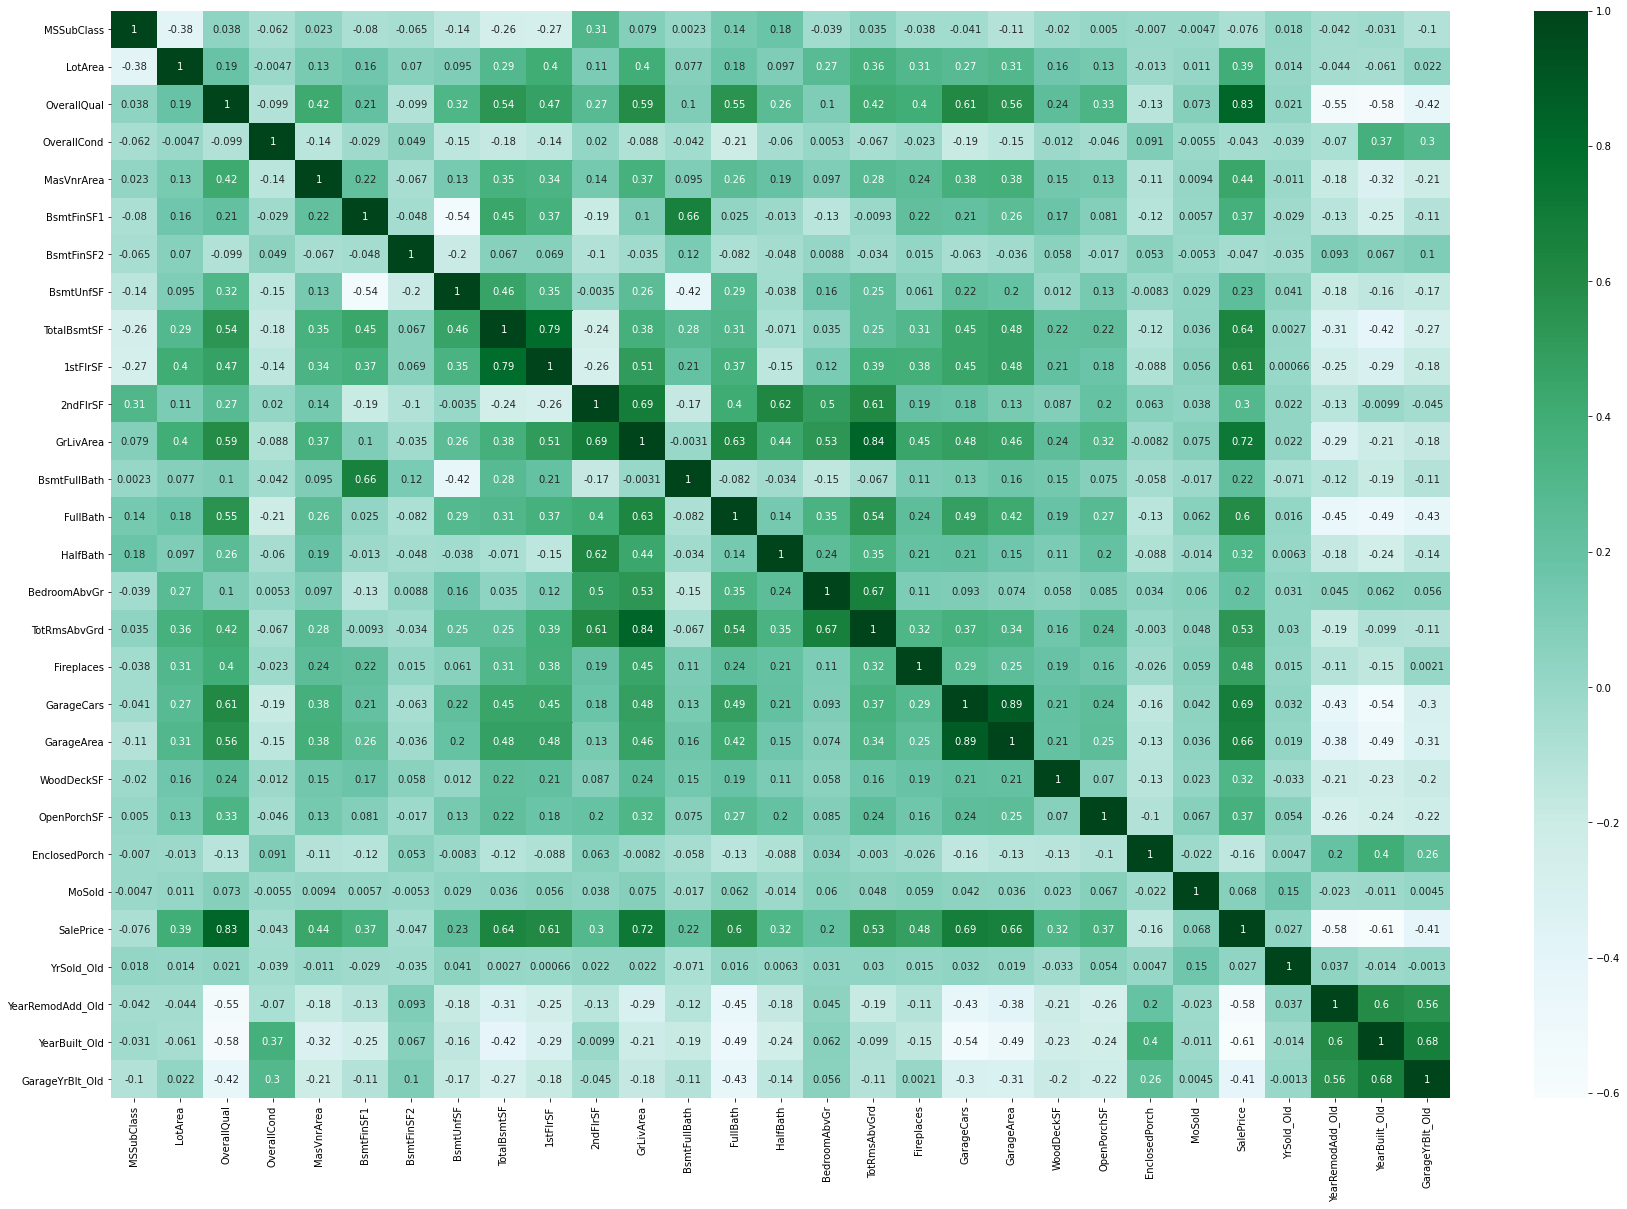

In [2072]:
# Checking continuou's variable correlation using heatmap

plt.figure(figsize=(30,20))
sns.heatmap(house_df[num_cols].corr(), cmap='BuGn', annot = True)
plt.show()

In [2073]:
# Drooping columns whose correlation is above 70%

def correlation(dataset, threshold):
    col_corr = set() 
    corr_matrix = house_df.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]  
                col_corr.add(colname)
    return col_corr

corr_features = correlation(house_df, 0.7)
len(set(corr_features))

4

In [2074]:
# Set of feature which has corr value greater than .70 which can result multicollinearity

corr_features

{'1stFlrSF', 'GarageArea', 'SalePrice', 'TotRmsAbvGrd'}

In [2075]:
# Dropping higly correlated features excluding SalePrice as it is our target variable

house_df = house_df.drop(['1stFlrSF', 'GarageArea', 'TotRmsAbvGrd'],axis=1)

In [2076]:
# Checking dataset shape after dropping feature 

house_df.shape

(1417, 53)

In [2077]:
# Updating numeric feature list after dropping feature 

num_cols = house_df.iloc[:, (np.where((house_df.dtypes == np.int64) | (house_df.dtypes == np.float64)))[0]].columns
num_cols

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'Fireplaces', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'MoSold', 'SalePrice', 'YrSold_Old',
       'YearRemodAdd_Old', 'YearBuilt_Old', 'GarageYrBlt_Old'],
      dtype='object')

In [2078]:
# Updating categorical feature list after dropping feature 

cat_cols = [col for col in house_df if col not in num_cols]
cat_cols

['MSZoning',
 'LotShape',
 'LandContour',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'HeatingQC',
 'KitchenQual',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'SaleType',
 'SaleCondition']

In [2079]:
# Ordinal categorical feature mapping

house_df['ExterQual'] = house_df.ExterQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house_df['ExterCond'] = house_df.ExterCond.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house_df['BsmtQual'] = house_df.BsmtQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house_df['BsmtCond'] = house_df.BsmtCond.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house_df['GarageQual'] = house_df.GarageQual.map({'NA':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
house_df['BsmtExposure'] = house_df.BsmtExposure.map({'NA':0,'No':1,'Mn':2,'Av':3,'Gd':4})
house_df['BsmtFinType1'] = house_df.BsmtFinType1.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
house_df['BsmtFinType2'] = house_df.BsmtFinType2.map({'NA':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
house_df['HeatingQC'] = house_df.HeatingQC.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house_df['KitchenQual'] = house_df.KitchenQual.map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
house_df['GarageFinish'] = house_df.GarageFinish.map({'NA':0,'Unf':1,'RFn':2,'Fin':3})

In [2080]:
# Dummy variable creation for nominal type

dummy_col = pd.get_dummies(house_df[['LandContour','MSZoning',
 'LotShape',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'Foundation',
 'GarageType',
 'SaleType',
 'SaleCondition']],drop_first=True)

house_df = pd.concat([house_df,dummy_col],axis='columns')

house_df = house_df.drop(['LandContour','MSZoning',
 'LotShape',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'Foundation',
 'GarageType',
 'SaleType',
 'SaleCondition'],axis='columns')

In [2081]:
# Checking dataset shape after dummy variable creation

house_df.shape

(1417, 154)

## Train Test Split

In [2082]:
# Import of train-test package
# Creation of training set(70%) and test set(30%) dataset from main dataset
# Checking the size of train and test dataset

from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(house_df, train_size = 0.7, test_size = 0.3, random_state = 100)

print(df_train.shape)
print(df_test.shape)

(991, 154)
(426, 154)


In [2083]:
['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'MoSold',
 'SalePrice',
 'YrSold_Old',
 'YearRemodAdd_Old',
 'YearBuilt_Old',
 'GarageYrBlt_Old']

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'MoSold',
 'SalePrice',
 'YrSold_Old',
 'YearRemodAdd_Old',
 'YearBuilt_Old',
 'GarageYrBlt_Old']

In [2084]:
num_cols

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'Fireplaces', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'MoSold', 'SalePrice', 'YrSold_Old',
       'YearRemodAdd_Old', 'YearBuilt_Old', 'GarageYrBlt_Old'],
      dtype='object')

In [2085]:
num_var = ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr','Fireplaces', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'MoSold', 'SalePrice', 'YrSold_Old', 'YearRemodAdd_Old', 'YearBuilt_Old', 'GarageYrBlt_Old','ExterQual','ExterCond','BsmtQual','BsmtCond','GarageQual','BsmtExposure','BsmtFinType1',
'BsmtFinType2','HeatingQC','KitchenQual','GarageFinish']

In [2086]:
# Import of MinMaxScaler

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [2087]:
# Rescaling the Features using MinMaxScaller

df_train[num_var] = scaler.fit_transform(df_train[num_var])
df_test[num_var] = scaler.transform(df_test[num_var])
df_train.head()

,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
829,0.823529,0.035223,0.666667,0.500,0.000000,0.666667,0.333333,0.666667,0.666667,0.000000,...,0,0,0,0,1,0,0,0,1,0
128,0.235294,0.201796,0.555556,0.500,0.254059,0.333333,0.333333,0.333333,0.666667,0.000000,...,0,0,0,0,1,0,0,0,1,0
695,0.000000,0.407157,0.555556,0.625,0.068768,0.333333,0.333333,0.666667,1.000000,0.000000,...,0,0,0,0,1,0,0,0,1,0
1317,0.588235,0.090879,0.666667,0.500,0.000000,0.666667,0.333333,1.000000,1.000000,0.000000,...,0,0,1,0,0,0,0,0,0,1
150,0.000000,0.293104,0.444444,0.625,0.000000,0.333333,0.333333,0.333333,0.666667,0.666667,...,0,0,0,0,1,0,0,0,1,0


In [2088]:
# Checking Test datset after split
df_test.head()

,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
995,0.176471,0.106790,0.333333,0.750,0.000000,0.333333,0.333333,0.333333,0.666667,0.000000,...,0,0,0,0,1,0,0,0,0,0
810,0.000000,0.285974,0.555556,0.625,0.094556,0.333333,0.333333,0.333333,0.666667,0.000000,...,0,0,0,0,1,0,0,0,1,0
781,0.235294,0.187370,0.555556,0.500,0.000000,0.666667,0.666667,0.666667,0.666667,0.000000,...,0,0,0,0,1,0,0,0,1,0
859,0.235294,0.315320,0.555556,0.750,0.210124,0.333333,0.333333,0.333333,0.666667,0.333333,...,0,0,0,0,1,0,0,0,1,0
584,0.176471,0.153270,0.333333,0.750,0.000000,0.333333,0.333333,0.333333,0.666667,0.000000,...,0,0,0,0,1,0,0,0,1,0


In [2089]:
# Dividing into X(independent) and Y(dependent) sets for the model building 

y_train = df_train.pop('SalePrice')
X_train = df_train
y_test = df_test.pop('SalePrice')
X_test = df_test

In [2090]:
# Printing shape of Train and Test dataset feature

print(y_train.shape)
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)

(991,)
(991, 153)
(426, 153)
(426,)


In [2091]:
# Recursive feature elimination
# Importing RFE and LinearRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [2092]:
# Running RFE to filter 50 top feature from all the features
# Total Features are 153 out of which 50 top feature is selected which as approx 35% of toatal feature


lm = LinearRegression()
lm.fit(X_train, y_train)

# Running RFE

rfe = RFE(lm,50)            
rfe = rfe.fit(X_train, y_train)

In [2093]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 97),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 16),
 ('ExterQual', False, 81),
 ('ExterCond', True, 1),
 ('BsmtQual', False, 71),
 ('BsmtCond', False, 80),
 ('BsmtExposure', False, 30),
 ('BsmtFinType1', False, 41),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinType2', False, 57),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('HeatingQC', True, 1),
 ('2ndFlrSF', False, 89),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 13),
 ('FullBath', False, 88),
 ('HalfBath', False, 28),
 ('BedroomAbvGr', False, 70),
 ('KitchenQual', False, 15),
 ('Fireplaces', True, 1),
 ('GarageFinish', False, 61),
 ('GarageCars', True, 1),
 ('GarageQual', True, 1),
 ('WoodDeckSF', True, 1),
 ('OpenPorchSF', True, 1),
 ('EnclosedPorch', True, 1),
 ('MoSold', False, 103),
 ('YrSold_Old', False, 63),
 ('YearRemodAdd_Old', False, 49),
 ('YearBuilt_Old', True, 1),
 ('GarageYrBlt_Old', False, 29),
 ('LandContou

In [2094]:
# Printing top 50 feature which is more important for the model after RFE

col = X_train.columns[rfe.support_]
col

Index(['LotArea', 'OverallQual', 'OverallCond', 'ExterCond', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'GrLivArea',
       'Fireplaces', 'GarageCars', 'GarageQual', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'YearBuilt_Old', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_Blueste',
       'Neighborhood_Crawfor', 'Neighborhood_MeadowV', 'Neighborhood_NridgHt',
       'Neighborhood_StoneBr', 'Condition1_PosA', 'Condition1_RRAe',
       'RoofStyle_Mansard', 'RoofStyle_Shed', 'Exterior1st_AsphShn',
       'Exterior1st_BrkComm', 'Exterior1st_BrkFace', 'Exterior1st_CBlock',
       'Exterior1st_CemntBd', 'Exterior1st_ImStucc', 'Exterior1st_Stucco',
       'Exterior2nd_AsphShn', 'Exterior2nd_CBlock', 'Exterior2nd_CmentBd',
       'Exterior2nd_Other', 'Exterior2nd_Stucco', 'Foundation_Stone',
       'Foundation_Wood', 'SaleType_CWD', 'SaleType_Con', 'SaleType_New',
       'SaleType_Oth', 'SaleCondition_AdjLand', 'SaleC

In [2095]:
# Printing all the feature which is less sifnificant asper RFE

X_train.columns[~rfe.support_]

Index(['MSSubClass', 'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', '2ndFlrSF',
       'BsmtFullBath',
       ...
       'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd',
       'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_WD',
       'SaleCondition_Alloca', 'SaleCondition_Family',
       'SaleCondition_Partial'],
      dtype='object', length=103)

In [2096]:
# Creating a new dataset with top 50 feature

X_train_rfe = X_train[col]

In [2097]:
# Printing the shape  a new dataset with top 50 feature

X_train_rfe.shape

(991, 50)

# Model building and Evaluation

## Linear Regression Model

In [2098]:
# Importing Statmodels package

import statsmodels.api as sm  

X_train_rfe = sm.add_constant(X_train_rfe)

# Running the linear model

lm = sm.OLS(y_train,X_train_rfe).fit() 

In [2099]:
# Calculating R2 ,RSS, MSE, RSME on Train dataset

y_Pred = lm.predict(X_train_rfe)
print("R2   on Train =",r2_score(y_train, y_Pred))
RSS = np.sum(np.square(y_train-y_Pred))
print("RSS  on Train =",RSS)
MSE = mean_squared_error(y_train, y_Pred)
print("MSE  on Train =",MSE)
RMSE = (MSE*0.5)
print("RSME on Train =",RMSE)

R2   on Train = 0.9274657928890855
RSS  on Train = 1.425477208243701
MSE  on Train = 0.0014384230153821403
RSME on Train = 0.0007192115076910702


Text(0.5, 0, 'Errors')

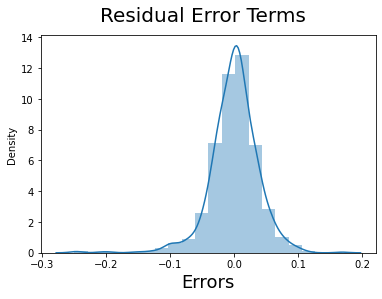

In [2100]:
# Calculation y_pred on Train dataset 

y_Pred = lm.predict(X_train_rfe)
res = y_train-y_Pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Residual Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18) 

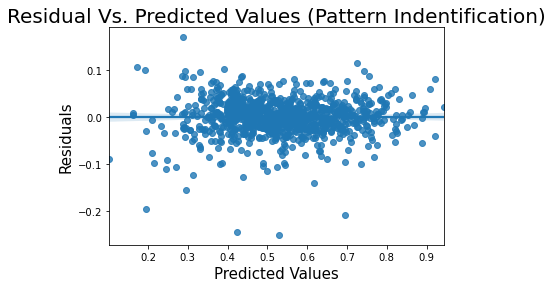

In [2101]:
# Ploting the distribution of Predicted value and Residual to check the pattern

sns.regplot(x=y_Pred, y=res)
plt.title('Residual Vs. Predicted Values (Pattern Indentification)', fontdict={'fontsize': 20})
plt.xlabel('Predicted Values', fontdict={'fontsize': 15})
plt.ylabel('Residuals', fontdict={'fontsize': 15})
plt.show()

## Validation on Test Set for Linear Model

In [2102]:
X_test_new.shape

(426, 50)

In [2103]:
X_train_new = X_train_rfe.drop(['const'], axis=1)

# Creating X_test_new dataframe by dropping variables from X_test using final trained column information

X_test_new = X_test[X_train_new.columns]

# Adding a constant variable to X_test_new dataset

X_test_rfe = sm.add_constant(X_test_new)

In [2104]:
X_test_rfe

,const,LotArea,OverallQual,OverallCond,ExterCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,...,Exterior2nd_Other,Exterior2nd_Stucco,Foundation_Stone,Foundation_Wood,SaleType_CWD,SaleType_Con,SaleType_New,SaleType_Oth,SaleCondition_AdjLand,SaleCondition_Normal
995,1.0,0.106790,0.333333,0.750,0.333333,0.175503,0.000000,0.155394,0.241435,0.333333,...,0,0,0,0,0,0,0,0,0,0
810,1.0,0.285974,0.555556,0.625,0.333333,0.303016,0.387860,0.000000,0.336134,0.000000,...,0,0,0,0,0,0,0,0,0,1
781,1.0,0.187370,0.555556,0.500,0.666667,0.176874,0.000000,0.160103,0.245960,1.000000,...,0,0,0,0,0,0,0,0,0,1
859,1.0,0.315320,0.555556,0.750,0.333333,0.282907,0.000000,0.186216,0.340659,0.333333,...,0,0,0,0,0,0,0,0,0,1
584,1.0,0.153270,0.333333,0.750,0.333333,0.000000,0.000000,0.378425,0.285714,1.000000,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,1.0,0.013634,0.333333,0.750,0.666667,0.226234,0.000000,0.057791,0.203620,0.666667,...,0,0,0,0,0,0,0,0,0,1
1445,1.0,0.228535,0.555556,0.500,0.333333,0.085466,0.645062,0.000000,0.263090,0.666667,...,0,0,0,0,0,0,0,0,0,1
397,1.0,0.201796,0.444444,0.500,0.333333,0.246801,0.000000,0.138699,0.279250,0.333333,...,0,0,0,0,0,0,0,0,0,1
1382,1.0,0.188922,0.666667,0.750,0.333333,0.000000,0.000000,0.255137,0.192631,1.000000,...,0,0,0,0,0,0,0,0,0,1


In [2105]:
X_test_rfe.shape

(426, 51)

In [2106]:
# Fitting test datset on the model and finding R2 

y_pred = lm.predict(X_test_rfe)
r2=r2_score(y_test, y_pred)
print("R2 on Test = ",round(r2,3))

R2 on Test =  0.901


In [2107]:


y_pred_train = lm.predict(X_train_rfe)
y_pred_test = lm.predict(X_test_rfe)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("r2_train  :",r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_test   :",r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("rss_train :",rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("rss_test  :",rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("mse_train :",mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("mse_test  :",mse_test_lr)
metric.append(mse_test_lr**0.5)

r2_train  : 0.9274657928890855
r2_test   : 0.9007875080293681
rss_train : 1.425477208243701
rss_test  : 0.8018242996278268
mse_train : 0.0014384230153821403
mse_test  : 0.0018822166657930205


### Observation

#### R2 value on Train = 0.927
#### R2 value on Train = 0.901
#### Model is not overfitting and satisfying the assumption of linear regression 

## LASSO Regularization

In [2108]:
lasso = Lasso()
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}
folds = 3
# cross validation
lasso_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
lasso_cv.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [2109]:
# Printing the best hyperparameter alpha

print(lasso_cv.best_params_)

{'alpha': 0.0001}


In [2110]:
# Fitting the data using best value of alpha(Lamda)

lasso = Lasso(alpha=0.0001)
lasso.fit(X_train, y_train)

Lasso(alpha=0.0001)

In [2111]:
# Printing coefficient value of all the feature

lasso.coef_

array([-1.57695104e-02,  7.80245060e-02,  1.72916982e-01,  1.30048218e-01,
        8.60263381e-03,  1.49836930e-02, -1.31748111e-02,  1.19938490e-02,
        0.00000000e+00,  1.22147448e-02,  1.00007743e-02,  5.45013430e-02,
        0.00000000e+00,  3.18206606e-03, -0.00000000e+00,  1.01261106e-01,
        1.99443443e-02,  0.00000000e+00,  2.82533207e-01,  1.00011296e-02,
        0.00000000e+00,  1.82170164e-02,  0.00000000e+00,  1.44016534e-02,
        2.66249750e-02,  7.62593728e-03,  6.31821020e-02,  3.22553995e-02,
        1.58186424e-02,  2.02433825e-02,  1.80855004e-02,  0.00000000e+00,
        5.24370859e-03, -1.09318054e-02, -1.02413993e-01,  1.05863311e-02,
        9.13853201e-03, -4.45081146e-03,  7.45629372e-03,  1.42695573e-02,
       -0.00000000e+00,  1.63707213e-02,  0.00000000e+00,  6.22972159e-04,
        0.00000000e+00,  4.37712891e-04,  8.66600572e-03, -8.66899678e-03,
       -0.00000000e+00, -1.19708173e-03,  0.00000000e+00, -0.00000000e+00,
        1.00581415e-02,  

### Observation
#### We can see that lasso has mode the coefficient of many feature as 0

In [2112]:
# Printing number of feature used in Lasso final model.

len(lasso.coef_)

153

In [2113]:
# Printing R2, RSS, MSE values for test and train sets in Lasso

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3=[]
r2_train_lr = r2_score(y_train,y_pred_train )
print("r2_train: ",r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_test:  ",r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train-y_pred_train))
print("RSS_train:",rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS_test: ",rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train,y_pred_train)
print("MSE_train:",mse_train_lr)
metric3.append(mse_train_lr)

mse_test_lr = mean_squared_error(y_test , y_pred_test)
print("MSE_test: ",mse_test_lr)
metric3.append(mse_test_lr)

r2_train:  0.9347047642232111
r2_test:   0.9064244459695731
RSS_train: 1.2832134535417796
RSS_test:  0.7562671956162853
MSE_train: 0.0012948672588716243
MSE_test:  0.0017752751070804818


In [2114]:
# Printing coefficient of Lasso model made with different range of alpha(lamda) value

cv_result_lsso = pd.DataFrame(lasso_cv.cv_results_)
cv_result_lsso['param_alpha'] = cv_result_lsso['param_alpha'].astype('float32')
cv_result_lsso.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.015610,0.000425,0.004158,0.000237,0.0001,{'alpha': 0.0001},-0.030973,-0.028515,-0.028584,-0.029357,0.001143,1,-0.023633,-0.025110,-0.024625,-0.024456,0.000615
1,0.012320,0.002045,0.004669,0.000409,0.0010,{'alpha': 0.001},-0.033213,-0.031353,-0.031512,-0.032026,0.000842,2,-0.029559,-0.031122,-0.030727,-0.030469,0.000664
2,0.012419,0.002203,0.006199,0.001656,0.0100,{'alpha': 0.01},-0.075982,-0.064878,-0.075002,-0.071954,0.005019,3,-0.070946,-0.070537,-0.070856,-0.070779,0.000176
3,0.011945,0.000815,0.007366,0.000979,0.1000,{'alpha': 0.1},-0.112899,-0.103352,-0.113202,-0.109818,0.004574,4,-0.108376,-0.112995,-0.107998,-0.109790,0.002272
4,0.011168,0.001299,0.006684,0.001189,0.2000,{'alpha': 0.2},-0.112899,-0.103352,-0.113202,-0.109818,0.004574,4,-0.108376,-0.112995,-0.107998,-0.109790,0.002272


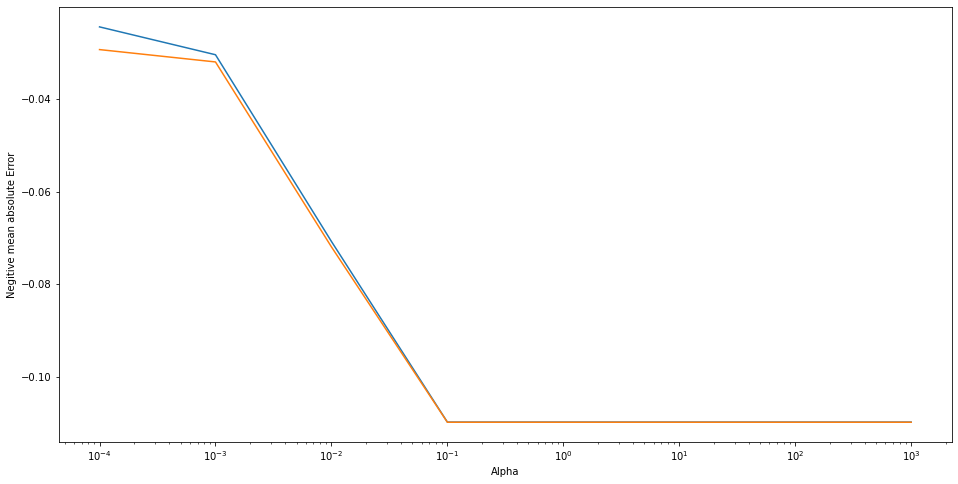

In [2115]:
# Visualisation of different value of alpha on Negitive mean absolute Error

plt.figure(figsize=(16,8))
plt.plot(cv_result_lsso['param_alpha'],cv_result_lsso['mean_train_score'])
plt.plot(cv_result_lsso['param_alpha'],cv_result_lsso['mean_test_score'])
plt.xscale('log')
plt.ylabel('Negitive mean absolute Error')
plt.xlabel('Alpha')
plt.show()

In [2116]:
# Checking R2 for the alpha 0.0001 on train and test set

lasso = Lasso(alpha=0.0001)
lasso.fit(X_train ,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print("R2 on Train Set =",r2_score(y_true=y_train,y_pred=y_train_pred))
print("R2 on Test  Set =",r2_score(y_true=y_test,y_pred=y_test_pred))

R2 on Train Set = 0.9347047642232111
R2 on Test  Set = 0.9064244459695731


In [2117]:
# Finding top 10 features

model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Featuere,Coef
19,BsmtFullBath,0.282533
3,OverallCond,0.172917
4,MasVnrArea,0.130048
16,HeatingQC,0.101261
2,OverallQual,0.078025
0,MSSubClass,0.063864
27,GarageQual,0.063182
12,BsmtFinType2,0.054501
56,Neighborhood_Edwards,0.043651
72,Neighborhood_Timber,0.040604


In [2118]:
# Shorting  Features whose coefficiensts are non-zero in a dataframe

lasso_df = pd.DataFrame({'Features':X_train.columns, 'Coefficient':lasso.coef_.round(4)})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

,Features,Coefficient
0,MSSubClass,-0.0158
1,LotArea,0.0780
2,OverallQual,0.1729
3,OverallCond,0.1300
4,MasVnrArea,0.0086
...,...,...
82,SaleType_ConLD,0.0013
83,SaleType_New,0.0314
84,SaleType_Oth,0.0090
85,SaleType_WD,-0.0068


## Ridge regression

In [2119]:
# Using RFE top 50 feature is selected

# Droping const column from test set

#X_test_new = X_test_new.drop(['const'], axis=1)

# list of alphas

params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation

folds = 5
ridge_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_cv.fit(X_train_new, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0,
                                   6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [2120]:
# Finding best hyperparameter alpha 

print(ridge_cv.best_params_)

{'alpha': 0.8}


In [2121]:
# Fit the data to Ridge

ridge = Ridge(alpha=0.8)
ridge.fit(X_train_new, y_train)
print(ridge.coef_)

[ 0.09192986  0.20253815  0.14037415 -0.02296976  0.09805095  0.01426249
  0.01672092  0.08644431  0.03507367  0.27352347  0.02916309  0.08585079
  0.03498144  0.02518318  0.03160089  0.02891617 -0.14819897  0.04735399
  0.01546308  0.03827506  0.0224482   0.01359832  0.0491603  -0.02919731
  0.02758897  0.04458839 -0.02099629 -0.04340216  0.01551355  0.02607307
 -0.01178903 -0.06210806  0.02373356 -0.00940608 -0.0173885   0.
  0.02289267 -0.01178903 -0.00940608  0.02065437 -0.02354649 -0.02005133
  0.01730973 -0.04031902  0.03754019  0.02578088  0.04835427  0.05576774
  0.02573877  0.02342189]


In [2122]:
# Printing number of feature used in Rasso final model.


len(ridge.coef_)

50

In [2123]:
# Displaying  the mean scores

ridge_results = pd.DataFrame(ridge_cv.cv_results_)
ridge_results = ridge_results[ridge_results['param_alpha']<=500]
ridge_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
10,0.8,-0.026881,-0.028633,1
9,0.7,-0.026842,-0.028633,2
11,0.9,-0.026921,-0.028638,3
8,0.6,-0.026805,-0.028638,4
12,1.0,-0.026965,-0.028646,5
7,0.5,-0.026768,-0.028651,6
6,0.4,-0.026734,-0.028672,7
5,0.3,-0.026701,-0.028706,8
4,0.2,-0.026673,-0.028763,9
3,0.1,-0.026647,-0.028838,10


In [2124]:
# Printing R2 , RSS, MSE for test train sets

y_pred_train = ridge.predict(X_train_new)
y_pred_test = ridge.predict(X_test_new)

metric2=[]
r2_train_lr = r2_score(y_train,y_pred_train )
print("r2_train :",r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_test  :",r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train-y_pred_train))
print("RSS_train:",rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS_test :",rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train,y_pred_train)
print("MSE_train:",mse_train_lr)
metric2.append(mse_train_lr)

mse_test_lr = mean_squared_error(y_test , y_pred_test)
print("MSE_test :",mse_test_lr)
metric2.append(mse_test_lr)

r2_train : 0.9268006122841517
r2_test  : 0.900364436756949
RSS_train: 1.4385496581878914
RSS_test : 0.8052435144863812
MSE_train: 0.0014516141858606372
MSE_test : 0.0018902429917520686


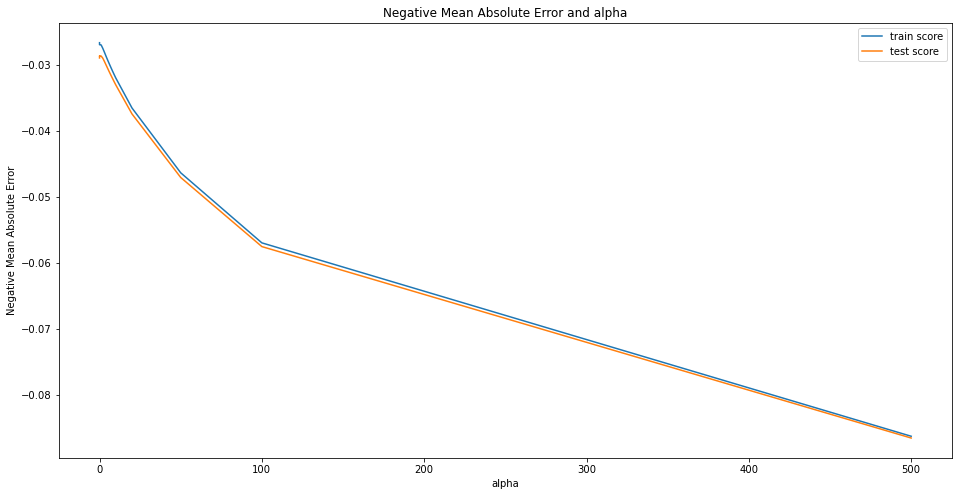

In [2125]:
# Plotting mean test and train scoes with alpha 

ridge_results['param_alpha'] = ridge_results['param_alpha'].astype('int32')

# Plotting

plt.figure(figsize=(16,8))
plt.plot(ridge_results['param_alpha'], ridge_results['mean_train_score'])
plt.plot(ridge_results['param_alpha'], ridge_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [2126]:
# Put the Features and coefficienst in a dataframe

ridge_df = pd.DataFrame({'Features':X_train_new.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

,Features,Coefficient
0,LotArea,0.0919
1,OverallQual,0.2025
2,OverallCond,0.1404
3,ExterCond,-0.0230
4,BsmtFinSF1,0.0981
5,BsmtFinSF2,0.0143
6,BsmtUnfSF,0.0167
7,TotalBsmtSF,0.0864
8,HeatingQC,0.0351
9,GrLivArea,0.2735


In [2127]:
# Finding top 10 parameters from ridge 

model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = X_train_new[ridge_df.Features]

ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feaure,Coef
10,Fireplaces,0.273523
2,OverallCond,0.202538
3,ExterCond,0.140374
5,BsmtFinSF2,0.098051
1,OverallQual,0.091930
8,HeatingQC,0.086444
12,GarageQual,0.085851
48,SaleCondition_AdjLand,0.055768
0,LotArea,0.050308
23,Neighborhood_MeadowV,0.049160


## Comparing the results of Linear Regression, Ridge and Lasso

In [2128]:
lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')
final = pd.concat([lr_metric, rg_metric,ls_metric],axis=1)
final


,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.927466,0.926801,0.934705
1,R2 Score (Test),0.900788,0.900364,0.906424
2,RSS (Train),1.425477,1.438550,1.283213
3,RSS (Test),0.801824,0.805244,0.756267
4,MSE (Train),0.037927,0.001452,0.001295
5,MSE (Test),0.043385,0.001890,0.001775


In [2129]:
lr_metric

,Metric,Linear Regression
0,R2 Score (Train),0.927466
1,R2 Score (Test),0.900788
2,RSS (Train),1.425477
3,RSS (Test),0.801824
4,MSE (Train),0.037927
5,MSE (Test),0.043385


# Final Conclusion

#### After observing the R2 os Linear, Lasso and Ridge on Train and Test LASSO is the BEST option.


#### The optimal lamda/alpha value in case of Ridge and Lasso is mentioned below:
#### Ridge - 0.8
#### Lasso - 0.0001
#### The Mean Squared error in case of Ridge and Lasso are:
#### Ridge - 0.001452
#### Lasso - 0.001295 
#### The Mean Squared Error of ridge is slightly higher than that of lasso

### After observing the R2 os Linear, Lasso and Ridge on Train and Test LASSO is the BEST option.
### Lasso helps in feature reduction (as the coefficient value of a feature became 0), Lasso has  better edge over Ridge.

### Top features which is significant in predicting the price of a house, based on Lasso, and how good those features describes the price of a house is mentioned below.

#### MSZoning_RL : Residential Low Density is good then it will also has significant effect on sales price.
#### BsmtFullBath : Houses with Basement and  Basement full bathrooms has significant increase in the sales price.
#### OverallCond :If the Overall Condition of house is Excellent the SalePrice is higher.
#### MasVnrArea : Masonry veneer area of the house also has significant increase in the sales price.
#### HeatingQC : Heating quality present in the house has significant increase in the sales price.
#### OverallQual : If the Overall quality of house is Excellent the SalePrice is higher.
#### MSSubClass : House type has significant affect on the sales price.
#### GarageQual : Garage quality in thehouse  has significant affect on the sales price.
#### BsmtFinType2 :	Finish quality of second basement in a House affect on the sales price.

#### --------------------------The End--------------------------------


# PART 2 - Subjective Questions

## Question 1

In [2130]:
# Fitting Lasso Model

lasso = Lasso(alpha=0.0002)
lasso.fit(X_train ,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9305908137015289
0.9046415404074


In [2131]:
# Printing R2, RSS, MSE values for test and train sets in Lasso

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3=[]
r2_train_lr = r2_score(y_train,y_pred_train )
print("r2_train: ",r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_test:  ",r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train-y_pred_train))
print("RSS_train:",rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS_test: ",rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train,y_pred_train)
print("MSE_train:",mse_train_lr)
metric3.append(mse_train_lr)

mse_test_lr = mean_squared_error(y_test , y_pred_test)
print("MSE_test: ",mse_test_lr)
metric3.append(mse_test_lr)

r2_train:  0.9305908137015289
r2_test:   0.9046415404074
RSS_train: 1.3640627926064908
RSS_test:  0.7706764396066001
MSE_train: 0.0013764508502588201
MSE_test:  0.0018090996234896718


In [2132]:
# Finding top 10 features whose coefficiensts are non-zero in a dataframe

model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Featuere,Coef
19,BsmtFullBath,0.280066
3,OverallCond,0.179230
4,MasVnrArea,0.123003
16,HeatingQC,0.100748
0,MSSubClass,0.073744
2,OverallQual,0.073105
27,GarageQual,0.067138
12,BsmtFinType2,0.053698
56,Neighborhood_Edwards,0.040027
146,SaleType_Oth,0.032514


In [2133]:
# Fitting the data to Ridge

ridge = Ridge(alpha=0.16)
ridge.fit(X_train_new, y_train)
print(ridge.coef_)

[ 0.09550484  0.2031844   0.14927568 -0.0286784   0.09899886  0.01449762
  0.01627071  0.0868486   0.03291091  0.28518521  0.02535601  0.08313314
  0.03897339  0.02347443  0.02955854  0.0314319  -0.15479323  0.05836528
  0.02630691  0.04833834  0.03395897  0.02112058  0.0497569  -0.02993122
  0.02717253  0.04670756 -0.02704558 -0.04861059  0.01424419  0.03780215
 -0.01647403 -0.07847464  0.02426056 -0.01185507 -0.02710301  0.
  0.02487693 -0.01647403 -0.01185507  0.02899425 -0.03888884 -0.0226949
  0.02143383 -0.05154392  0.04415975  0.03995326  0.04896143  0.07362938
  0.032421    0.0239932 ]


In [2134]:
# Printing R2 , RSS, MSE for test train sets

y_pred_train = ridge.predict(X_train_new)
y_pred_test = ridge.predict(X_test_new)

metric2=[]
r2_train_lr = r2_score(y_train,y_pred_train )
print("r2_train :",r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_test  :",r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train-y_pred_train))
print("RSS_train:",rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS_test :",rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train,y_pred_train)
print("MSE_train:",mse_train_lr)
metric2.append(mse_train_lr)

mse_test_lr = mean_squared_error(y_test , y_pred_test)
print("MSE_test :",mse_test_lr)
metric2.append(mse_test_lr)

r2_train : 0.9274253649918666
r2_test  : 0.9008037473346433
RSS_train: 1.4262717167708956
RSS_test : 0.8016930553729955
MSE_train: 0.001439224739425727
MSE_test : 0.0018819085806877829


In [2135]:
# Put the Features and coefficienst in a dataframe

ridge_df = pd.DataFrame({'Features':X_train_new.columns, 'Coefficient':ridge.coef_.round(4)})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

,Features,Coefficient
0,LotArea,0.0955
1,OverallQual,0.2032
2,OverallCond,0.1493
3,ExterCond,-0.0287
4,BsmtFinSF1,0.0990
5,BsmtFinSF2,0.0145
6,BsmtUnfSF,0.0163
7,TotalBsmtSF,0.0868
8,HeatingQC,0.0329
9,GrLivArea,0.2852


In [2136]:
## Comparing the results of Ridge and Lasso after double alpha value

resultTable = {'Metric':["R2 Score Train", "R2Score Test", "RSS Train", "RSS Test", "MSE Train", "MSE Test"],
              'Ridge regression':metric2}

rg_metric = pd.DataFrame(resultTable, columns=["Metric", 'Ridge regression'])
ls_metric = pd.Series(metric3, name ='Lasso regression')
final = pd.concat([rg_metric,ls_metric],axis=1)
final

,Metric,Ridge regression,Lasso regression
0,R2 Score Train,0.927425,0.930591
1,R2Score Test,0.900804,0.904642
2,RSS Train,1.426272,1.364063
3,RSS Test,0.801693,0.770676
4,MSE Train,0.001439,0.001376
5,MSE Test,0.001882,0.001809


# Question 2

# Question 3

In [2137]:
# Creatinf a new dataset and dropping top 5 feature found using Lasso

house_Lasso = house_df
house_Lasso = house_Lasso.drop(["BsmtFullBath", "OverallCond", "MasVnrArea", "HeatingQC", "OverallQual"], axis=1)

In [2138]:
# Train Test Split

df_train, df_test = train_test_split(house_Lasso, train_size=0.7,test_size = 0.3, random_state=100)

In [2139]:
# Scalling numeric feature

num_var = ['MSSubClass', 'LotArea',  'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF',
       'GrLivArea',  'FullBath', 'HalfBath', 'BedroomAbvGr','Fireplaces', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'MoSold', 'SalePrice', 'YrSold_Old', 'YearRemodAdd_Old', 'YearBuilt_Old', 'GarageYrBlt_Old','ExterQual','ExterCond','BsmtQual','BsmtCond','GarageQual','BsmtExposure','BsmtFinType1',
'BsmtFinType2','KitchenQual','GarageFinish']

scaler = MinMaxScaler()
df_train[num_var] = scaler.fit_transform(df_train[num_var])
df_test[num_var] = scaler.transform(df_test[num_var])


In [2140]:
# Dividing into X and Y sets for the model building

y_train = df_train.pop('SalePrice')
X_train = df_train
y_test = df_test.pop('SalePrice')
X_test = df_test

In [2141]:
# Fitting Lasso Model

lasso = Lasso(alpha=0.0001)
lasso.fit(X_train ,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.917178016563833
0.8834706392908711


In [2142]:
# Printing R2, RSS, MSE values for test and train sets in Lasso

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3=[]
r2_train_lr = r2_score(y_train,y_pred_train )
print("r2_train: ",r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_test:  ",r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train-y_pred_train))
print("RSS_train:",rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS_test: ",rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train,y_pred_train)
print("MSE_train:",mse_train_lr)
metric3.append(mse_train_lr)

mse_test_lr = mean_squared_error(y_test , y_pred_test)
print("MSE_test: ",mse_test_lr)
metric3.append(mse_test_lr)

r2_train:  0.917178016563833
r2_test:   0.8834706392908711
RSS_train: 1.6276575485172482
RSS_test:  0.9417773022406687
MSE_train: 0.0016424395040537318
MSE_test:  0.002210744840940537


In [2143]:
# Finding top 10 features whose coefficiensts are non-zero in a dataframe

model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coef']
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Featuere,Coef
15,FullBath,0.309302
0,MSSubClass,0.154848
13,2ndFlrSF,0.114311
23,WoodDeckSF,0.087571
22,GarageQual,0.066010
2,ExterQual,0.063201
9,BsmtFinType2,0.054328
51,Neighborhood_Edwards,0.052947
67,Neighborhood_Timber,0.051514
6,BsmtExposure,0.047073
